# Telecom Churn Case Study
## Customers Churn Prediction
---

## Problem Statement
---

Build ML models to predict churn:
- Predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc
- Identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks. A good choice to identify important variables is a logistic regression model or a model from the tree family.
- Overall accuracy will be primary evaluation metric.
- Metrics like precision, recall, etc for different models should be calculated
- Build a ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Find which metric can be used in such scenarios.
- Recommend strategies to manage customer churn based on the observations.
- Try using a dimensionality reduction technique such as PCA and then build a predictive model.
- Use additional techniques like Class Imbalance handling, Boosting, etc to improve accuracy.

## Steps
---

- Data Understanding, Preparation, and Pre-Processing:
 - Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
 - Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format

- Exploratory Data Analysis:
 - Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
 - Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data
 
- Feature Engineering and Variable Transformation:
 - Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
 - Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data
 
- Model Selection, Model Building, and  Prediction:
 - Identifying the type of problem and making a list of decisive models from all available choices
 - Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
 - Testing each model on the respective model evaluation metric
 - Choosing the best model based on the fit of the data set and output variable
 - Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem
 
- Final Recommendations

### Data understanding, preparation and pre-processing

In [173]:
# Import required python libraries to work with CSV file and plot basic graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings while working with various libraries
import warnings
warnings.filterwarnings('ignore')

In [174]:
# Load given dataset day.csv file in dataset variable
dataset = pd.read_csv("train.csv")
dataset.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [175]:
# Get basic information about dataset
dataset.shape

(69999, 172)

In [176]:
# Get basic information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [177]:
# Get basic information about dataset
dataset.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [178]:
# Get basic information about dataset
dataset.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

#### Data Cleaning

In [179]:
# Keep track of all dropped columns in a single varible
columns_dropped = []

In [180]:
# Drop irrelevant columns that will not affect the telecom churn
# Id - this is an index column

column_names_irrelevant = ['id']
dataset.drop(column_names_irrelevant, axis = 1, inplace=True)

columns_dropped += column_names_irrelevant

dataset.shape

(69999, 171)

#### Drop Duplicates

In [181]:
# Drop duplicate data

print('Dataset Share before dropping duplicates:', dataset.shape)
dataset.drop_duplicates(inplace=True)
print('Dataset Share after dropping duplicates:', dataset.shape)

Dataset Share before dropping duplicates: (69999, 171)
Dataset Share after dropping duplicates: (69999, 171)


#### Find columns with unique values

In [182]:
dataset.nunique().sort_values(ascending = True).head(20)

circle_id               1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_7        1
std_og_t2c_mou_6        1
std_ic_t2o_mou_6        1
last_date_of_month_7    1
last_date_of_month_8    1
loc_og_t2o_mou          1
std_og_t2o_mou          1
last_date_of_month_6    1
loc_ic_t2o_mou          1
churn_probability       2
night_pck_user_8        2
fb_user_8               2
fb_user_7               2
fb_user_6               2
night_pck_user_7        2
night_pck_user_6        2
dtype: int64

In [183]:
# Drop columns will all values unique (unique count = 1)
# If all values in a column are same, that will not add any value to the predictive model
# So these can be dropped

column_names_with_all_values_same = []

for col in dataset.columns:
    unique_values_in_col = dataset[col].nunique()
    if(unique_values_in_col == 1):
        column_names_with_all_values_same += [col]

print('Columns to drop: ', column_names_with_all_values_same)

dataset.drop(column_names_with_all_values_same, axis = 1, inplace=True)

columns_dropped += column_names_with_all_values_same

dataset.shape

Columns to drop:  ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


(69999, 158)

Columns where all values were same are dropped now.

#### Date related columns

In [184]:
# we do not need date related columns for this analysis
# So Date columns can be dropped

date_columns = list(filter(lambda col_name: 'date' in col_name, dataset.columns.tolist()))

print('Columns to drop: ', date_columns)

dataset.drop(date_columns, axis = 1, inplace=True)

columns_dropped += date_columns

dataset.shape

Columns to drop:  ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


(69999, 152)

#### Handling null values

In [185]:
# Find percentage of total data missing

total_values = dataset.shape[0] * dataset.shape[1]
null_values = dataset.isnull().sum().sum()

percentage_missing = null_values / total_values * 100
print('Percentage data missing: ', percentage_missing.round(2), "%")

Percentage data missing:  15.53 %


[]

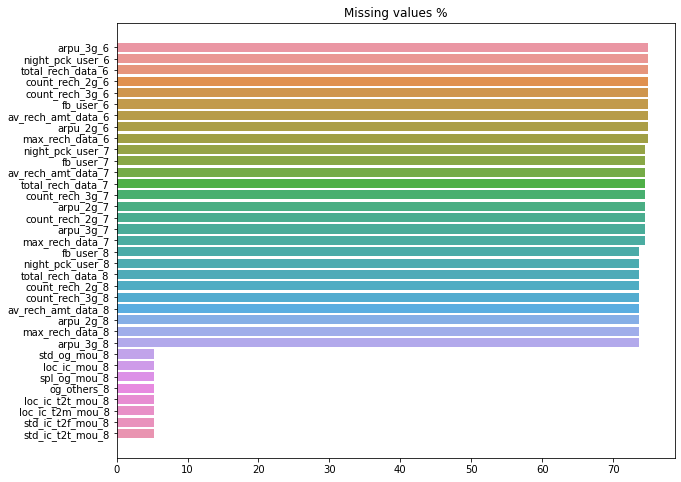

In [186]:
# Find percentage of null values in each column
missing_vals_percent = (dataset.isnull().sum() / dataset.shape[0] * 100).sort_values(ascending = False).head(35)

plt.figure(figsize = (10, 8))
sns.barplot(missing_vals_percent[:] , missing_vals_percent[:].index)
plt.title('Missing values %')
plt.plot()

Many columns above have More than 75% data missing.

In [187]:
# Drop columns where more than 30% data is missing, as imputation here will create bias in data

column_names_with_more_than_30_percent_values_missing = []

for col in dataset.columns:
    missing_values_percent_in_col = dataset[col].isnull().sum() / dataset.shape[0] * 100
    if(missing_values_percent_in_col > 30):
        column_names_with_more_than_30_percent_values_missing += [col]

print('Columns to drop: ', column_names_with_more_than_30_percent_values_missing)

dataset.drop(column_names_with_more_than_30_percent_values_missing, axis = 1, inplace=True)

columns_dropped += column_names_with_more_than_30_percent_values_missing

dataset.shape

Columns to drop:  ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


(69999, 125)

In [188]:
# Find percentage of total data missing

total_values = dataset.shape[0] * dataset.shape[1]
null_values = dataset.isnull().sum().sum()

percentage_missing = null_values / total_values * 100
print('Percentage data missing: ', percentage_missing.round(2), "%")

Percentage data missing:  2.83 %


#### Missing values Imputation

__We only have 2.83 % missing data. Here our options are:__
- __We can drop the rows with missing data__
- __We can fill missing data with mean/ median/ mode__
- __We can apply some business understanding and impute values__
- __We can use libraries like IterativeImputer or fancyImpute to fill missing data__

##### Option 1 - Can we drop rows with missing data?

In [189]:
# Looking at missing values for 6th month

june_columns = filter(lambda col_name: '_6' in col_name or 'jun' in col_name, dataset.columns.tolist())
june_columns_with_missing_values = []
for col in june_columns:
    missing_vals_percent = dataset[col].isnull().sum() / dataset.shape[0] * 100
    if(missing_vals_percent > 0):
        print(col, ":", missing_vals_percent.round(2), '%')
        june_columns_with_missing_values.append(col)

onnet_mou_6 : 3.95 %
offnet_mou_6 : 3.95 %
roam_ic_mou_6 : 3.95 %
roam_og_mou_6 : 3.95 %
loc_og_t2t_mou_6 : 3.95 %
loc_og_t2m_mou_6 : 3.95 %
loc_og_t2f_mou_6 : 3.95 %
loc_og_t2c_mou_6 : 3.95 %
loc_og_mou_6 : 3.95 %
std_og_t2t_mou_6 : 3.95 %
std_og_t2m_mou_6 : 3.95 %
std_og_t2f_mou_6 : 3.95 %
std_og_mou_6 : 3.95 %
isd_og_mou_6 : 3.95 %
spl_og_mou_6 : 3.95 %
og_others_6 : 3.95 %
loc_ic_t2t_mou_6 : 3.95 %
loc_ic_t2m_mou_6 : 3.95 %
loc_ic_t2f_mou_6 : 3.95 %
loc_ic_mou_6 : 3.95 %
std_ic_t2t_mou_6 : 3.95 %
std_ic_t2m_mou_6 : 3.95 %
std_ic_t2f_mou_6 : 3.95 %
std_ic_mou_6 : 3.95 %
spl_ic_mou_6 : 3.95 %
isd_ic_mou_6 : 3.95 %
ic_others_6 : 3.95 %


All above columns have same 3.95% values missing. 
- Most likely data for 6th month for these customers is missing, or they might be new customers started from July

lets look at rows where all June values are null

In [190]:
# Build the condition to find data rows in which all june columns are null

condition = ""
for col in june_columns_with_missing_values:
    condition += "dataset['" +col+"'].isnull()"
condition = condition.replace('.isnull()dataset', '.isnull() & dataset')
print(condition)

dataset['onnet_mou_6'].isnull() & dataset['offnet_mou_6'].isnull() & dataset['roam_ic_mou_6'].isnull() & dataset['roam_og_mou_6'].isnull() & dataset['loc_og_t2t_mou_6'].isnull() & dataset['loc_og_t2m_mou_6'].isnull() & dataset['loc_og_t2f_mou_6'].isnull() & dataset['loc_og_t2c_mou_6'].isnull() & dataset['loc_og_mou_6'].isnull() & dataset['std_og_t2t_mou_6'].isnull() & dataset['std_og_t2m_mou_6'].isnull() & dataset['std_og_t2f_mou_6'].isnull() & dataset['std_og_mou_6'].isnull() & dataset['isd_og_mou_6'].isnull() & dataset['spl_og_mou_6'].isnull() & dataset['og_others_6'].isnull() & dataset['loc_ic_t2t_mou_6'].isnull() & dataset['loc_ic_t2m_mou_6'].isnull() & dataset['loc_ic_t2f_mou_6'].isnull() & dataset['loc_ic_mou_6'].isnull() & dataset['std_ic_t2t_mou_6'].isnull() & dataset['std_ic_t2m_mou_6'].isnull() & dataset['std_ic_t2f_mou_6'].isnull() & dataset['std_ic_mou_6'].isnull() & dataset['spl_ic_mou_6'].isnull() & dataset['isd_ic_mou_6'].isnull() & dataset['ic_others_6'].isnull()


In [191]:
# Use condition built above to find number of rows
dataset[
        dataset['onnet_mou_6'].isnull() & dataset['offnet_mou_6'].isnull() & 
        dataset['roam_ic_mou_6'].isnull() & dataset['roam_og_mou_6'].isnull() & 
        dataset['loc_og_t2t_mou_6'].isnull() & dataset['loc_og_t2m_mou_6'].isnull() & 
        dataset['loc_og_t2f_mou_6'].isnull() & dataset['loc_og_t2c_mou_6'].isnull() & 
        dataset['loc_og_mou_6'].isnull() & dataset['std_og_t2t_mou_6'].isnull() & 
        dataset['std_og_t2m_mou_6'].isnull() & dataset['std_og_t2f_mou_6'].isnull() & 
        dataset['std_og_mou_6'].isnull() & dataset['isd_og_mou_6'].isnull() & 
        dataset['spl_og_mou_6'].isnull() & dataset['og_others_6'].isnull() & 
        dataset['loc_ic_t2t_mou_6'].isnull() & dataset['loc_ic_t2m_mou_6'].isnull() & 
        dataset['loc_ic_t2f_mou_6'].isnull() & dataset['loc_ic_mou_6'].isnull() & 
        dataset['std_ic_t2t_mou_6'].isnull() & dataset['std_ic_t2m_mou_6'].isnull() & 
        dataset['std_ic_t2f_mou_6'].isnull() & dataset['std_ic_mou_6'].isnull() & 
        dataset['spl_ic_mou_6'].isnull() & dataset['isd_ic_mou_6'].isnull() & 
        dataset['ic_others_6'].isnull()
].shape

(2768, 125)

There are 2768 rows where all june values are missing. Performing similar analysis for July and August data rows

In [192]:
# Looking at missing values for 7th month

july_columns = list(filter(lambda col_name: '_7' in col_name or 'jul' in col_name, dataset.columns.tolist()))
july_columns_with_missing_values = []
for col in july_columns:
    missing_vals_percent = dataset[col].isnull().sum() / dataset.shape[0] * 100
    if(missing_vals_percent > 0):
        july_columns_with_missing_values.append(col)
        print(col, ':', missing_vals_percent.round(2), '%')

onnet_mou_7 : 3.84 %
offnet_mou_7 : 3.84 %
roam_ic_mou_7 : 3.84 %
roam_og_mou_7 : 3.84 %
loc_og_t2t_mou_7 : 3.84 %
loc_og_t2m_mou_7 : 3.84 %
loc_og_t2f_mou_7 : 3.84 %
loc_og_t2c_mou_7 : 3.84 %
loc_og_mou_7 : 3.84 %
std_og_t2t_mou_7 : 3.84 %
std_og_t2m_mou_7 : 3.84 %
std_og_t2f_mou_7 : 3.84 %
std_og_mou_7 : 3.84 %
isd_og_mou_7 : 3.84 %
spl_og_mou_7 : 3.84 %
og_others_7 : 3.84 %
loc_ic_t2t_mou_7 : 3.84 %
loc_ic_t2m_mou_7 : 3.84 %
loc_ic_t2f_mou_7 : 3.84 %
loc_ic_mou_7 : 3.84 %
std_ic_t2t_mou_7 : 3.84 %
std_ic_t2m_mou_7 : 3.84 %
std_ic_t2f_mou_7 : 3.84 %
std_ic_mou_7 : 3.84 %
spl_ic_mou_7 : 3.84 %
isd_ic_mou_7 : 3.84 %
ic_others_7 : 3.84 %


In [193]:
# Build the condition to find data rows in which all july columns are null

condition = ""
for col in july_columns_with_missing_values:
    condition += "dataset['" +col+"'].isnull()"
condition = condition.replace('.isnull()dataset', '.isnull() & dataset')
print(condition)

dataset['onnet_mou_7'].isnull() & dataset['offnet_mou_7'].isnull() & dataset['roam_ic_mou_7'].isnull() & dataset['roam_og_mou_7'].isnull() & dataset['loc_og_t2t_mou_7'].isnull() & dataset['loc_og_t2m_mou_7'].isnull() & dataset['loc_og_t2f_mou_7'].isnull() & dataset['loc_og_t2c_mou_7'].isnull() & dataset['loc_og_mou_7'].isnull() & dataset['std_og_t2t_mou_7'].isnull() & dataset['std_og_t2m_mou_7'].isnull() & dataset['std_og_t2f_mou_7'].isnull() & dataset['std_og_mou_7'].isnull() & dataset['isd_og_mou_7'].isnull() & dataset['spl_og_mou_7'].isnull() & dataset['og_others_7'].isnull() & dataset['loc_ic_t2t_mou_7'].isnull() & dataset['loc_ic_t2m_mou_7'].isnull() & dataset['loc_ic_t2f_mou_7'].isnull() & dataset['loc_ic_mou_7'].isnull() & dataset['std_ic_t2t_mou_7'].isnull() & dataset['std_ic_t2m_mou_7'].isnull() & dataset['std_ic_t2f_mou_7'].isnull() & dataset['std_ic_mou_7'].isnull() & dataset['spl_ic_mou_7'].isnull() & dataset['isd_ic_mou_7'].isnull() & dataset['ic_others_7'].isnull()


In [194]:
# Use condition built above to find number of rows
dataset[
        dataset['onnet_mou_7'].isnull() & dataset['offnet_mou_7'].isnull() & 
        dataset['roam_ic_mou_7'].isnull() & dataset['roam_og_mou_7'].isnull() & 
        dataset['loc_og_t2t_mou_7'].isnull() & dataset['loc_og_t2m_mou_7'].isnull() & 
        dataset['loc_og_t2f_mou_7'].isnull() & dataset['loc_og_t2c_mou_7'].isnull() & 
        dataset['loc_og_mou_7'].isnull() & dataset['std_og_t2t_mou_7'].isnull() & 
        dataset['std_og_t2m_mou_7'].isnull() & dataset['std_og_t2f_mou_7'].isnull() & 
        dataset['std_og_mou_7'].isnull() & dataset['isd_og_mou_7'].isnull() & 
        dataset['spl_og_mou_7'].isnull() & dataset['og_others_7'].isnull() & 
        dataset['loc_ic_t2t_mou_7'].isnull() & dataset['loc_ic_t2m_mou_7'].isnull() & 
        dataset['loc_ic_t2f_mou_7'].isnull() & dataset['loc_ic_mou_7'].isnull() & 
        dataset['std_ic_t2t_mou_7'].isnull() & dataset['std_ic_t2m_mou_7'].isnull() & 
        dataset['std_ic_t2f_mou_7'].isnull() & dataset['std_ic_mou_7'].isnull() & 
        dataset['spl_ic_mou_7'].isnull() & dataset['isd_ic_mou_7'].isnull() & 
        dataset['ic_others_7'].isnull()
].shape

(2687, 125)

There are 2687 rows where all july values are missing. Performing similar analysis for August data rows

In [195]:
# Looking at missing values for 8th month

august_columns = list(filter(lambda col_name: '_8' in col_name or 'aug' in col_name, dataset.columns.tolist()))
august_columns_with_missing_values = []
for col in august_columns:
    missing_vals_percent = dataset[col].isnull().sum() / dataset.shape[0] * 100
    if(missing_vals_percent > 0):
        august_columns_with_missing_values.append(col)
        print(col, ':', missing_vals_percent.round(2), '%')

onnet_mou_8 : 5.29 %
offnet_mou_8 : 5.29 %
roam_ic_mou_8 : 5.29 %
roam_og_mou_8 : 5.29 %
loc_og_t2t_mou_8 : 5.29 %
loc_og_t2m_mou_8 : 5.29 %
loc_og_t2f_mou_8 : 5.29 %
loc_og_t2c_mou_8 : 5.29 %
loc_og_mou_8 : 5.29 %
std_og_t2t_mou_8 : 5.29 %
std_og_t2m_mou_8 : 5.29 %
std_og_t2f_mou_8 : 5.29 %
std_og_mou_8 : 5.29 %
isd_og_mou_8 : 5.29 %
spl_og_mou_8 : 5.29 %
og_others_8 : 5.29 %
loc_ic_t2t_mou_8 : 5.29 %
loc_ic_t2m_mou_8 : 5.29 %
loc_ic_t2f_mou_8 : 5.29 %
loc_ic_mou_8 : 5.29 %
std_ic_t2t_mou_8 : 5.29 %
std_ic_t2m_mou_8 : 5.29 %
std_ic_t2f_mou_8 : 5.29 %
std_ic_mou_8 : 5.29 %
spl_ic_mou_8 : 5.29 %
isd_ic_mou_8 : 5.29 %
ic_others_8 : 5.29 %


In [196]:
# Build the condition to find data rows in which all august columns are null

condition = ""
for col in august_columns_with_missing_values:
    condition += "dataset['" +col+"'].isnull()"
condition = condition.replace('.isnull()dataset', '.isnull() & dataset')
print(condition)

dataset['onnet_mou_8'].isnull() & dataset['offnet_mou_8'].isnull() & dataset['roam_ic_mou_8'].isnull() & dataset['roam_og_mou_8'].isnull() & dataset['loc_og_t2t_mou_8'].isnull() & dataset['loc_og_t2m_mou_8'].isnull() & dataset['loc_og_t2f_mou_8'].isnull() & dataset['loc_og_t2c_mou_8'].isnull() & dataset['loc_og_mou_8'].isnull() & dataset['std_og_t2t_mou_8'].isnull() & dataset['std_og_t2m_mou_8'].isnull() & dataset['std_og_t2f_mou_8'].isnull() & dataset['std_og_mou_8'].isnull() & dataset['isd_og_mou_8'].isnull() & dataset['spl_og_mou_8'].isnull() & dataset['og_others_8'].isnull() & dataset['loc_ic_t2t_mou_8'].isnull() & dataset['loc_ic_t2m_mou_8'].isnull() & dataset['loc_ic_t2f_mou_8'].isnull() & dataset['loc_ic_mou_8'].isnull() & dataset['std_ic_t2t_mou_8'].isnull() & dataset['std_ic_t2m_mou_8'].isnull() & dataset['std_ic_t2f_mou_8'].isnull() & dataset['std_ic_mou_8'].isnull() & dataset['spl_ic_mou_8'].isnull() & dataset['isd_ic_mou_8'].isnull() & dataset['ic_others_8'].isnull()


In [197]:
# Use condition built above to find number of rows
dataset[
        dataset['onnet_mou_8'].isnull() & dataset['offnet_mou_8'].isnull() & 
        dataset['roam_ic_mou_8'].isnull() & dataset['roam_og_mou_8'].isnull() & 
        dataset['loc_og_t2t_mou_8'].isnull() & dataset['loc_og_t2m_mou_8'].isnull() & 
        dataset['loc_og_t2f_mou_8'].isnull() & dataset['loc_og_t2c_mou_8'].isnull() & 
        dataset['loc_og_mou_8'].isnull() & dataset['std_og_t2t_mou_8'].isnull() & 
        dataset['std_og_t2m_mou_8'].isnull() & dataset['std_og_t2f_mou_8'].isnull() & 
        dataset['std_og_mou_8'].isnull() & dataset['isd_og_mou_8'].isnull() & 
        dataset['spl_og_mou_8'].isnull() & dataset['og_others_8'].isnull() & 
        dataset['loc_ic_t2t_mou_8'].isnull() & dataset['loc_ic_t2m_mou_8'].isnull() & 
        dataset['loc_ic_t2f_mou_8'].isnull() & dataset['loc_ic_mou_8'].isnull() & 
        dataset['std_ic_t2t_mou_8'].isnull() & dataset['std_ic_t2m_mou_8'].isnull() & 
        dataset['std_ic_t2f_mou_8'].isnull() & dataset['std_ic_mou_8'].isnull() & 
        dataset['spl_ic_mou_8'].isnull() & dataset['isd_ic_mou_8'].isnull() & 
        dataset['ic_others_8'].isnull()
].shape

(3703, 125)

There are 3703 rows where all august values are missing.

In all we would have to drop 2768 + 2687 + 3703 = 9158 rows. Which is about 13% of the data. There might be some common rows where more than 1 month data is missing, but still we can not drop these rows. Lets look at option 2 for data imputation

##### Option 2 - Impute using libraries

In [198]:
# Import Library and Enable experimental feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [199]:
# Fit and transform the data to get imputed values
imputer = IterativeImputer(random_state=39)
imputer.fit(dataset)

imputed_with_imputer_dataset = pd.DataFrame(imputer.transform(dataset), columns = dataset.columns)

In [200]:
imputed_with_imputer_dataset.shape

(69999, 125)

In [201]:
# Find percentage of total data missing
total_values = dataset.shape[0] * dataset.shape[1]
null_values = imputed_with_imputer_dataset.isnull().sum().sum()

percentage_missing = null_values / total_values * 100
print('Percentage data missing: ', percentage_missing.round(2), "%")

Percentage data missing:  0.0 %


We have imputed all missing values, and retaining all data rows. So moving on with option 2.

In [202]:
dataset = imputed_with_imputer_dataset

In [203]:
# Find percentage of total data missing

total_values = dataset.shape[0] * dataset.shape[1]
null_values = dataset.isnull().sum().sum()

percentage_missing = null_values / total_values * 100
print('Percentage data missing: ', percentage_missing.round(2), "%")

Percentage data missing:  0.0 %


##### Checkpoint - 1

In [205]:
# Lets store this imputed dataset back in a csv file, as imputation took about 20 minutes on my laptop
# dataset.to_csv('dataset_c1.csv', index=False)

In [206]:
# print(columns_dropped)

['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [207]:
# Code will support rerun from this point, to skip all above calculations.
# Code loads the last saved csv file and start from here again
# To start again from this checkpoint, just uncomment below lines

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
# dataset = pd.read_csv("dataset_c1.csv")
# columns_dropped = ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


### Feature Engineering and Variable Transformation

In [208]:
recharge_columns = list(filter(lambda col_name: '_rech' in col_name, dataset.columns.tolist()))
print(recharge_columns)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']


In [209]:
# We can derive total recharge amount across 3 months
dataset['total_rech_amt'] = dataset['total_rech_amt_6'] + dataset['total_rech_amt_7'] + dataset['total_rech_amt_8']
dataset[['total_rech_amt','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].head(5)

# now we can drop individual recharge columns
column_names_to_drop = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
print('Columns to drop: ', column_names_to_drop)

dataset.drop(column_names_to_drop, axis = 1, inplace=True)

columns_dropped += column_names_to_drop

dataset.shape

Columns to drop:  ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']


(69999, 123)

In [210]:
dataset['total_rech_amt'].describe(percentiles=[.25,.50,.60,.70,.80,.90,1])

count     69999.000000
mean        974.362505
std        1106.099526
min           0.000000
25%         360.000000
50%         692.000000
60%         868.000000
70%        1097.000000
80%        1429.000000
90%        2052.000000
100%     120845.000000
max      120845.000000
Name: total_rech_amt, dtype: float64

In [211]:
# Consider top 30 percentile customers are high value customers, so add a new column to identify this
high_value_customer = []
for row in dataset['total_rech_amt']:
    if row >= 1097.0:
        high_value_customer.append(True)
    else:
        high_value_customer.append(False)

dataset['high_value_customer'] = high_value_customer

dataset[['high_value_customer','total_rech_amt']].head(5)

high_value_customer  total_rech_amt
0                False           152.0
1                False           195.0
2                False           190.0
3                False           530.0
4                False           548.0

### Exploratory Data Analysis

#### Identify Categorical and numerical variables

In [212]:
dataset.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 124 columns):
 #    Column               Dtype  
---   ------               -----  
 0    arpu_6               float64
 1    arpu_7               float64
 2    arpu_8               float64
 3    onnet_mou_6          float64
 4    onnet_mou_7          float64
 5    onnet_mou_8          float64
 6    offnet_mou_6         float64
 7    offnet_mou_7         float64
 8    offnet_mou_8         float64
 9    roam_ic_mou_6        float64
 10   roam_ic_mou_7        float64
 11   roam_ic_mou_8        float64
 12   roam_og_mou_6        float64
 13   roam_og_mou_7        float64
 14   roam_og_mou_8        float64
 15   loc_og_t2t_mou_6     float64
 16   loc_og_t2t_mou_7     float64
 17   loc_og_t2t_mou_8     float64
 18   loc_og_t2m_mou_6     float64
 19   loc_og_t2m_mou_7     float64
 20   loc_og_t2m_mou_8     float64
 21   loc_og_t2f_mou_6     float64
 22   loc_og_t2f_mou_7     float64
 23   loc_og_t2

In [213]:
# All columns are float64 dataType, we can't identify categorical variables using data type
# lets look at number of unique values, and lets say anything having 35 or less uniques is a categorical variable

category_cols = []
continuous_cols = []
for col in dataset.columns:
    if(dataset[col].nunique() < 35):
        category_cols.append(col)
    else:
        continuous_cols.append(col)

print('Category Columns: ', category_cols)
print('Total Category Columns :' + str(len(category_cols)))
print('______________________________')
print('Continuous Columns: ', continuous_cols)
print('Total Continuous Columns :' + str(len(continuous_cols)))

Category Columns:  ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'churn_probability', 'high_value_customer']
Total Category Columns :14
______________________________
Continuous Columns:  ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7

#### Univariate Analysis

In [214]:
# Define Plotting functions

def histPlot_monthly(col_name):
    cols = [col_name+"_6", col_name+"_7", col_name+"_8"]
    plt.figure(figsize=(15, 5))
    plotCounter = 1
    for col in cols:
        plt.subplot(1, 3, plotCounter)
        plt.hist(dataset[col])
        plt.xlabel(col)
        plotCounter = plotCounter + 1
    plt.tight_layout()
    plt.show()
    
def histPlot(col_name):
    cols = [col_name]
    plt.figure(figsize=(5, 5))
    plotCounter = 1
    for col in cols:
        plt.subplot(1, 1, plotCounter)
        plt.hist(dataset[col])
        plt.xlabel(col)
        plotCounter = plotCounter + 1
    plt.tight_layout()
    plt.show()

#### Plotting Continuous variables

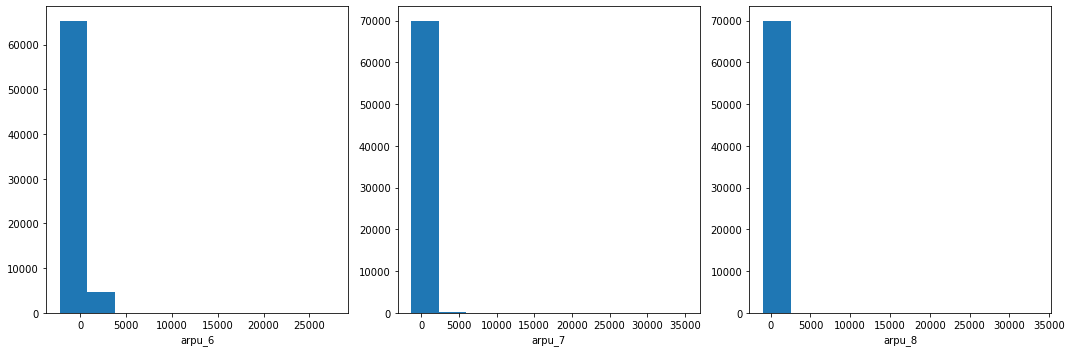

In [215]:
histPlot_monthly("arpu")

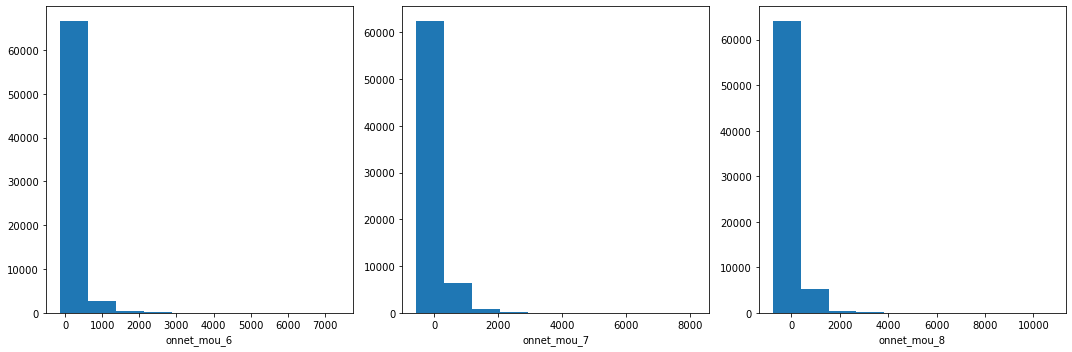

In [216]:
histPlot_monthly("onnet_mou")

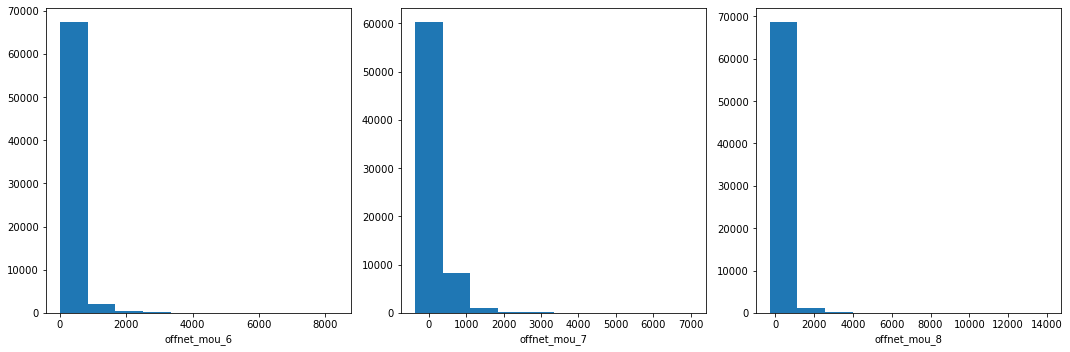

In [217]:
histPlot_monthly("offnet_mou")

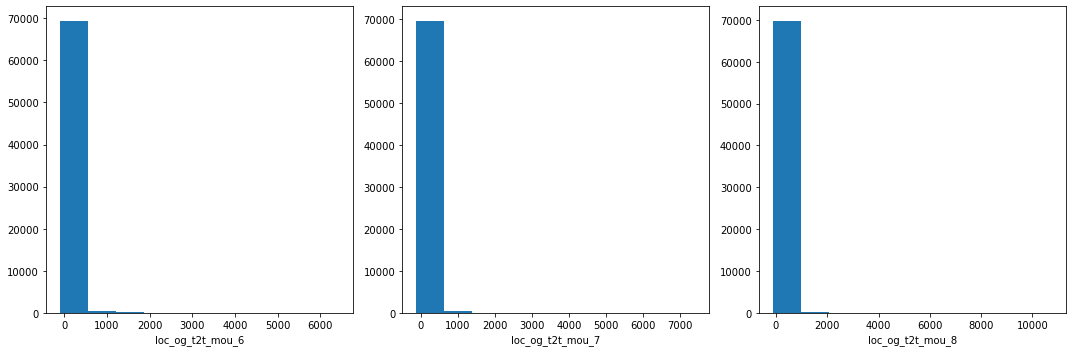

In [218]:
histPlot_monthly("loc_og_t2t_mou")

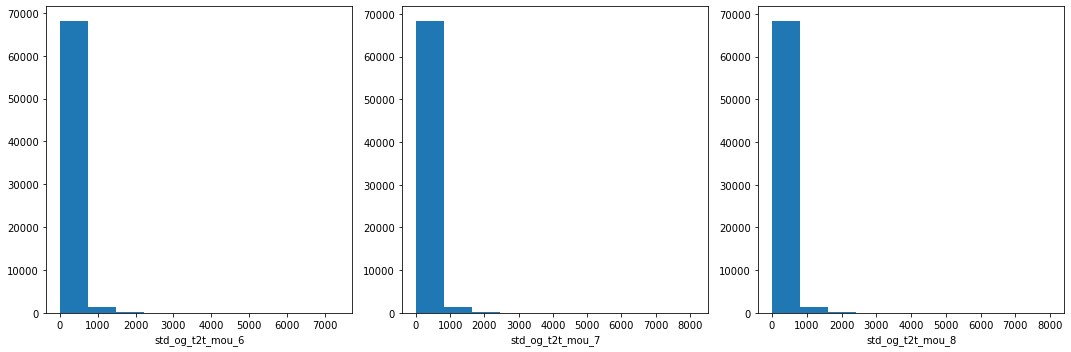

In [219]:
histPlot_monthly("std_og_t2t_mou")

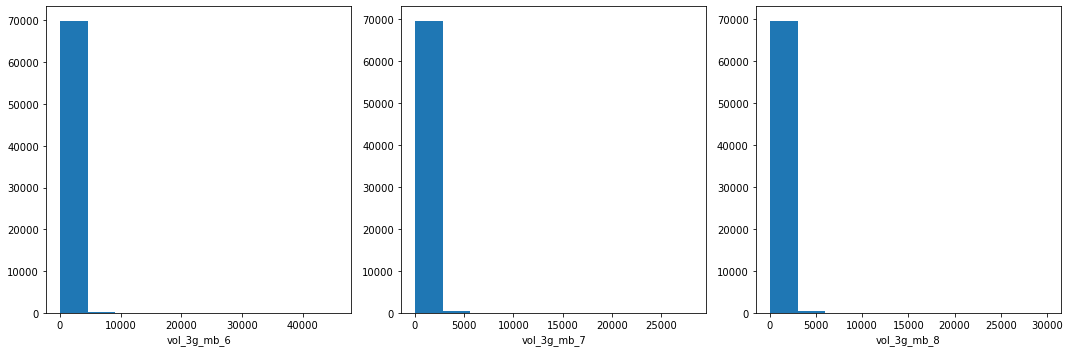

In [220]:
histPlot_monthly("vol_3g_mb")

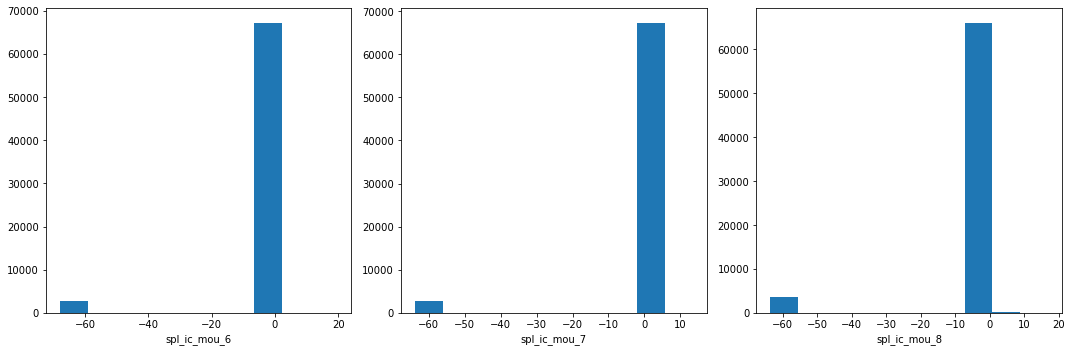

In [221]:
histPlot_monthly("spl_ic_mou")

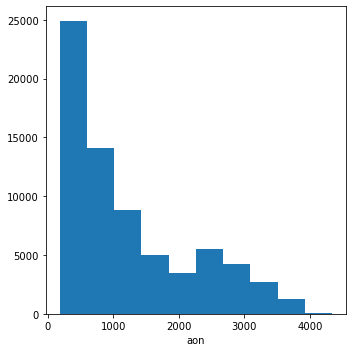

In [222]:
histPlot("aon")

#### Observations
- No significant observation is obvious from histogram plots
- Only aon columns is showing data distribution, all other columns showing grouping around 0 values

#### Plotting Categorical variables

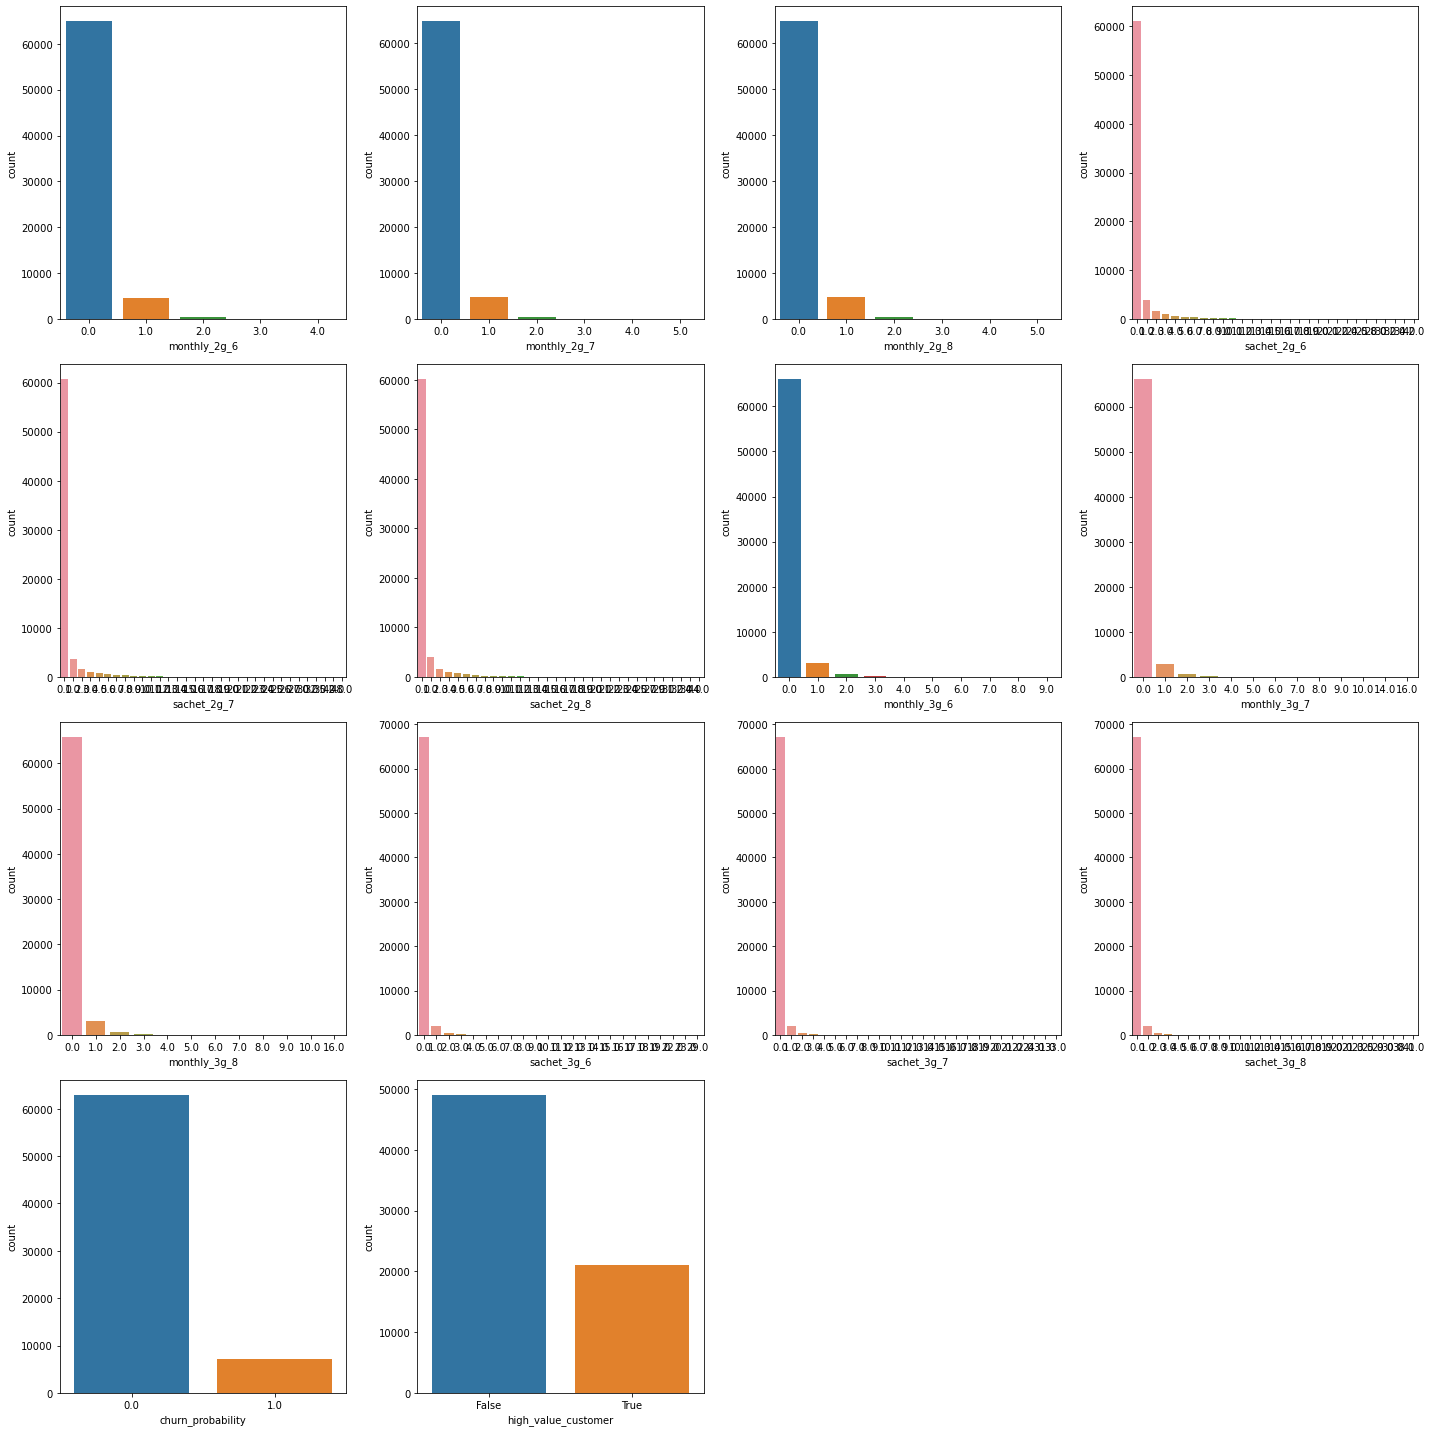

In [223]:
plt.figure(figsize=(20, 20))

plotCounter = 1
for col in category_cols[:16]:
    plt.subplot(4, 4, plotCounter)
    sns.countplot(x = dataset[col])
    plt.xlabel(col)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

#### Observations
- Most category columns have lot of data around 0
- We have High non-churn customers, than churn customers
- High value customers plot is showing significant difference in categories

#### Bivariate Analysis

<AxesSubplot:xlabel='total_og_mou_6', ylabel='total_og_mou_7'>

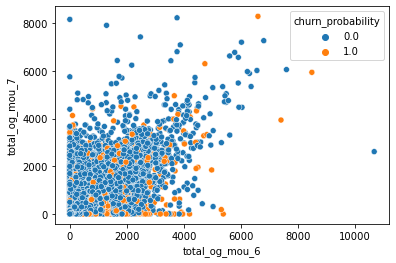

In [224]:
# total_og_mou_6 vs total_og_mou_7 with respect to churn_probability
sns.scatterplot(x=dataset['total_og_mou_6'], y=dataset['total_og_mou_7'],hue=dataset['churn_probability'])

<AxesSubplot:xlabel='total_og_mou_7', ylabel='total_og_mou_8'>

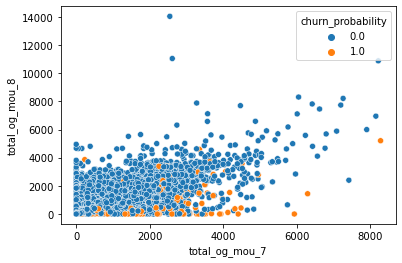

In [225]:
# total_og_mou_7 vs total_og_mou_8 with respect to churn_probability
sns.scatterplot(x=dataset['total_og_mou_7'], y=dataset['total_og_mou_8'],hue=dataset['churn_probability'])

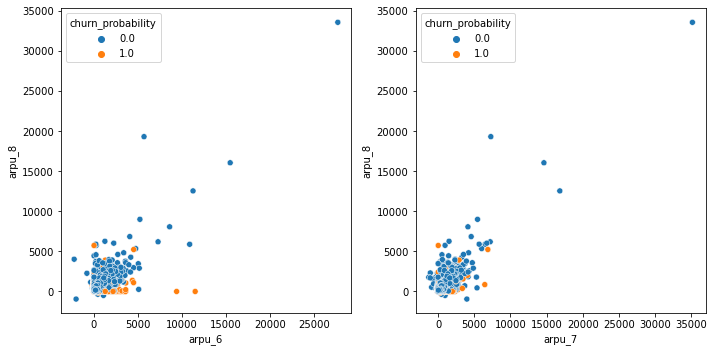

In [226]:
# 'arpu_6', 'arpu_7', 'arpu_8'  with respect to churn_probability
plt.figure(figsize=(10, 5))
cols = ['arpu_6', 'arpu_7']

plotCounter = 1
for col in cols[:2]:
    plt.subplot(1, 2, plotCounter)
    sns.scatterplot(x=dataset[col], y=dataset['arpu_8'],hue=dataset['churn_probability'])
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

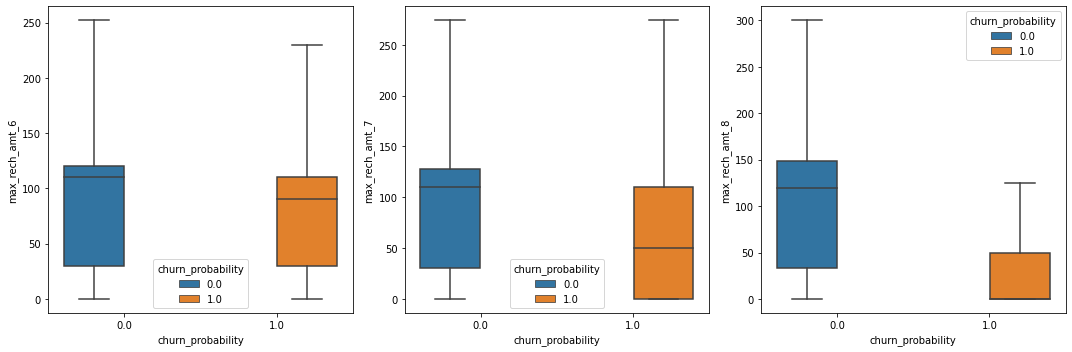

In [227]:
# 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'  with respect to churn_probability
plt.figure(figsize=(15, 5))
cols = ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']

plotCounter = 1
for col in cols:
    plt.subplot(1, 3, plotCounter)
    sns.boxplot(data=dataset, y=col,x="churn_probability",hue="churn_probability", showfliers=False)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

From above, we can see Churn customers Max_Recharge_Amount reduced significantly in 7th (mean) and 8th month

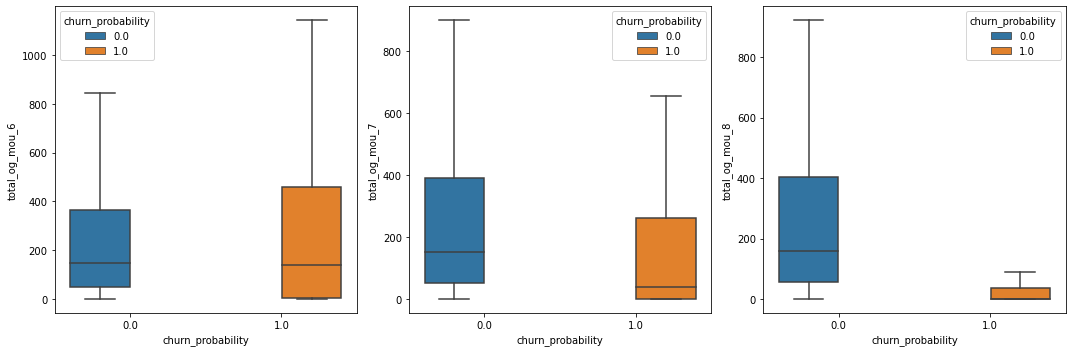

In [228]:
# 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'  with respect to churn_probability
plt.figure(figsize=(15, 5))
cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

plotCounter = 1
for col in cols:
    plt.subplot(1, 3, plotCounter)
    sns.boxplot(data=dataset, y=col,x="churn_probability",hue="churn_probability", showfliers=False)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

From above, we can see Churn customers total_outgoing_minutes_of_usage reduced significantly in 8th month

#### Corelated features

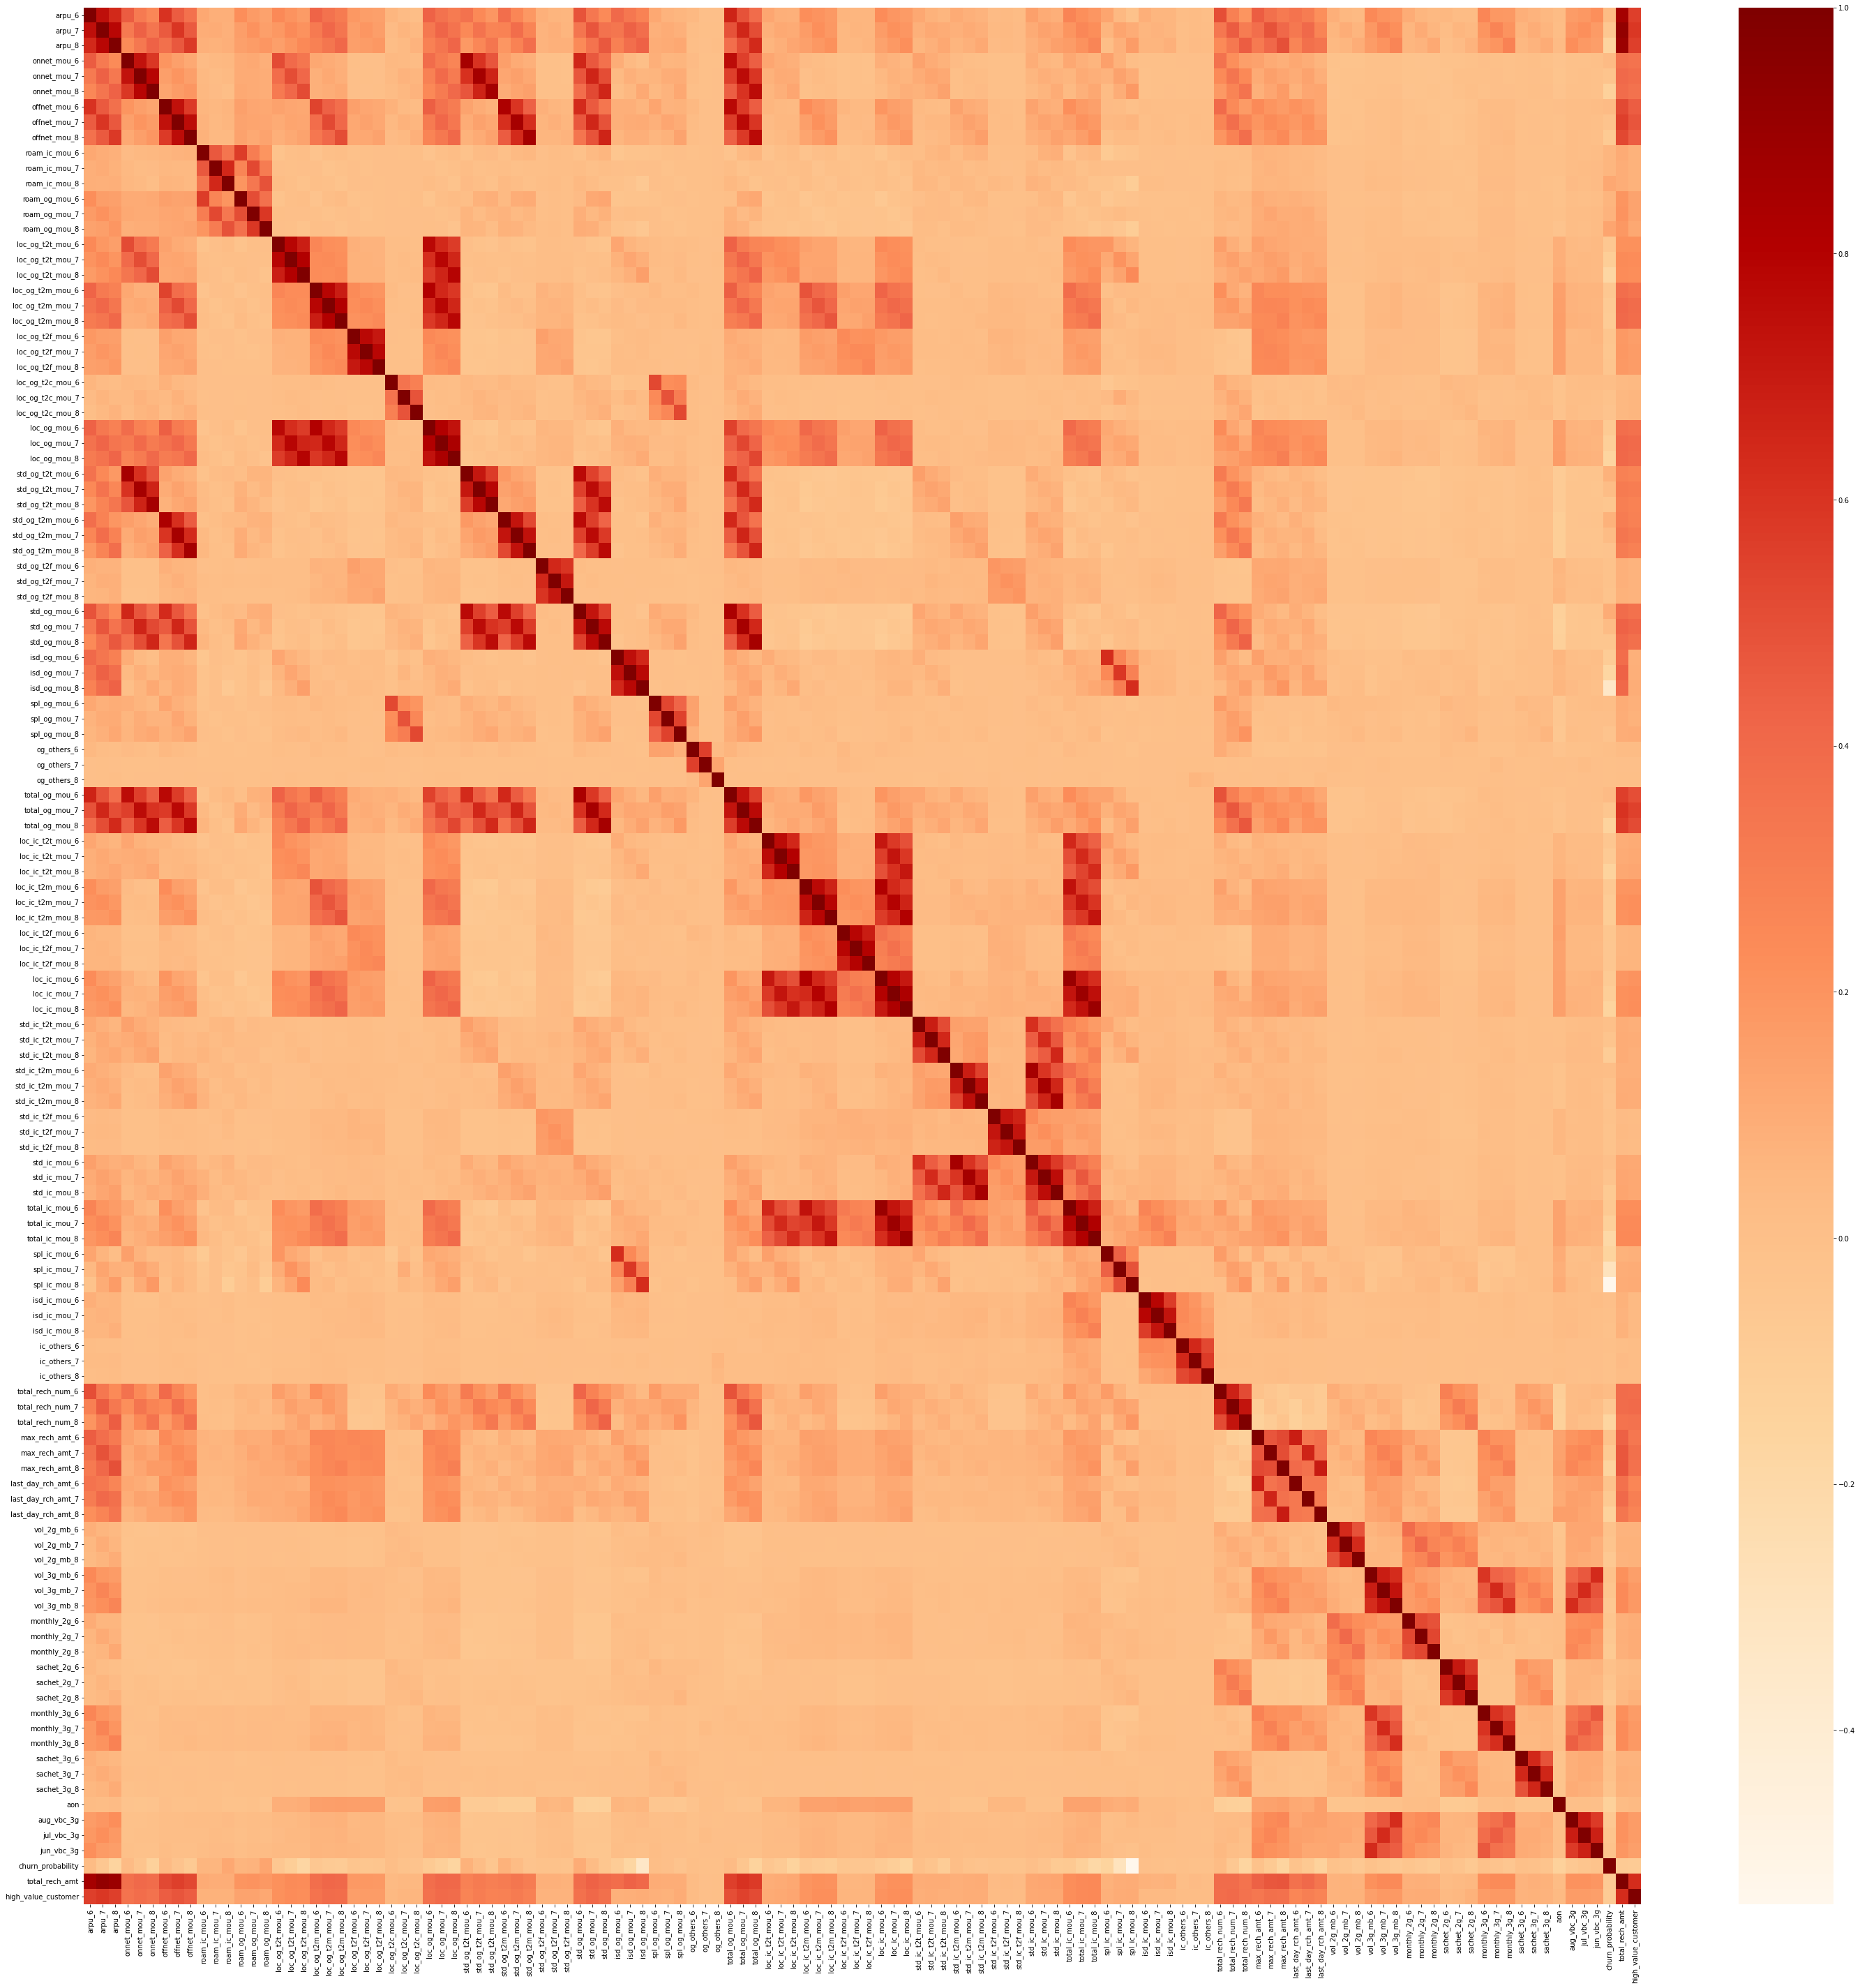

In [229]:
# plot correlation graph
plt.figure(figsize = (50, 50))

sns.heatmap(dataset.corr(), cmap="OrRd", annot = False)
plt.show()

#### Observations
- Few variables are corelated
- Because we have lot of variables, building monthly heatmaps will bring more value

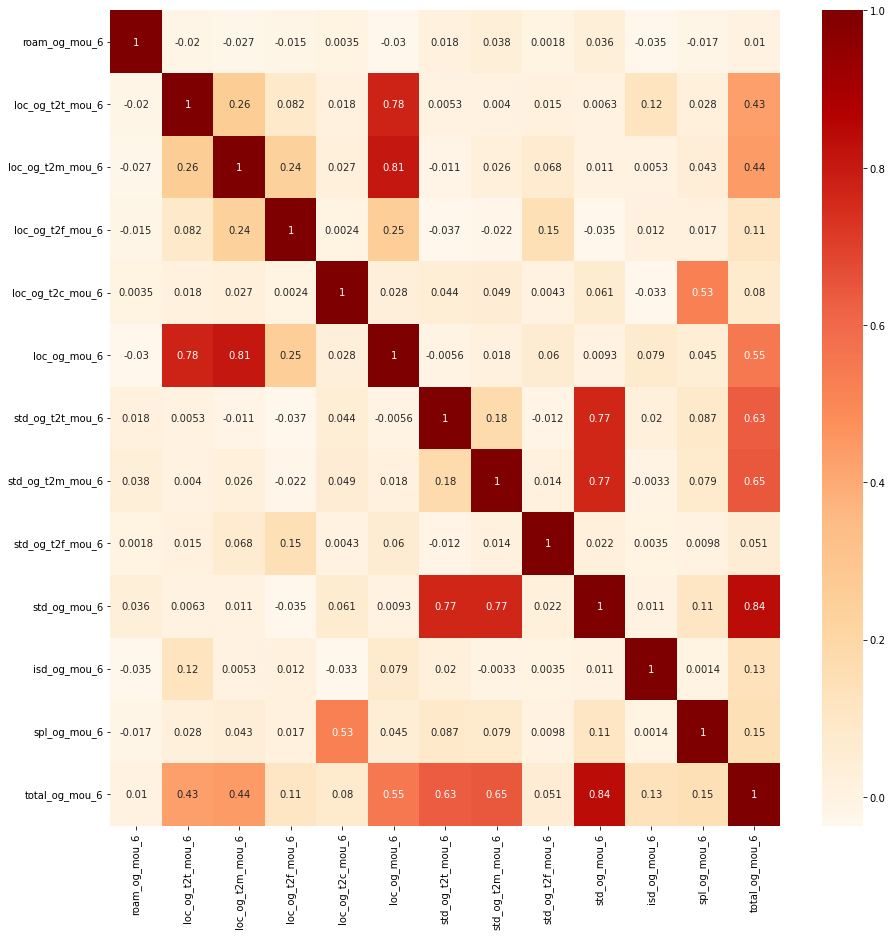

In [230]:
# plot correlation graph for June month data outgoing call columns
plt.figure(figsize = (15, 15))

june_og_columns = dataset.columns[dataset.columns.str.contains('.*_og_.*mou_6',regex=True)]
filteredDataset = dataset.filter(june_og_columns)

sns.heatmap(filteredDataset.corr(), cmap="OrRd", annot = True)
plt.show()

#### Observations
- total_og_mou_6, std_og_mou_6, loc_og_mou_6 are correlated feature

In [231]:
# Observed correlated columns can be dropped
# Same columns for 7th and 8th month can also be dropped
column_names_to_drop = ['total_og_mou_6','std_og_mou_6','loc_og_mou_6',
                        'total_og_mou_7','std_og_mou_7','loc_og_mou_7',
                        'total_og_mou_8','std_og_mou_8','loc_og_mou_8']
print('Columns to drop: ', column_names_to_drop)
dataset.drop(column_names_to_drop, axis = 1, inplace=True)
columns_dropped += column_names_to_drop
dataset.shape

Columns to drop:  ['total_og_mou_6', 'std_og_mou_6', 'loc_og_mou_6', 'total_og_mou_7', 'std_og_mou_7', 'loc_og_mou_7', 'total_og_mou_8', 'std_og_mou_8', 'loc_og_mou_8']


(69999, 115)

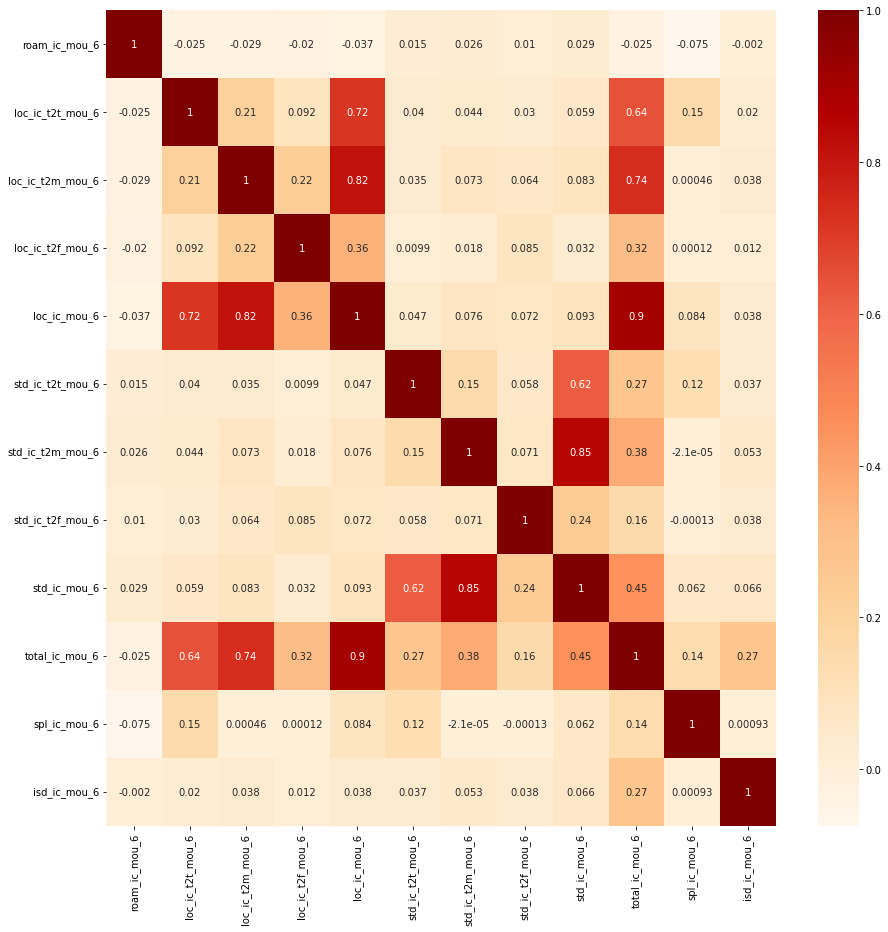

In [232]:
# plot correlation graph for June month data incoming call columns
plt.figure(figsize = (15, 15))

june_ic_columns = dataset.columns[dataset.columns.str.contains('.*_ic_.*mou_6',regex=True)]
filteredDataset = dataset.filter(june_ic_columns)

sns.heatmap(filteredDataset.corr(), cmap="OrRd", annot = True)
plt.show()

#### Observations
- total_ic_mou_6, std_ic_mou_6, loc_ic_mou_6 are correlated feature

In [233]:
# Observed correlated columns can be dropped
# Same columns for 7th and 8th month can also be dropped
column_names_to_drop = ['total_ic_mou_6','std_ic_mou_6','loc_ic_mou_6',
                        'total_ic_mou_7','std_ic_mou_7','loc_ic_mou_7',
                        'total_ic_mou_8','std_ic_mou_8','loc_ic_mou_8']
print('Columns to drop: ', column_names_to_drop)
dataset.drop(column_names_to_drop, axis = 1, inplace=True)
columns_dropped += column_names_to_drop
dataset.shape

Columns to drop:  ['total_ic_mou_6', 'std_ic_mou_6', 'loc_ic_mou_6', 'total_ic_mou_7', 'std_ic_mou_7', 'loc_ic_mou_7', 'total_ic_mou_8', 'std_ic_mou_8', 'loc_ic_mou_8']


(69999, 106)

##### Checkpoint - 2

In [234]:
# Lets store this imputed dataset back in a csv file, as imputation took about 20 minutes on my laptop
# dataset.to_csv('dataset_c2.csv', index=False)

In [235]:
# print(columns_dropped)

['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_og_mou_6', 'std_og_mou_6', 'loc_og_mo

In [236]:
# Code will support rerun from this point, to skip all above calculations.
# Code loads the last saved csv file and start from here again
# To start again from this checkpoint, just uncomment below lines

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
# dataset = pd.read_csv("dataset_c2.csv")
# columns_dropped = ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_og_mou_6', 'std_og_mou_6', 'loc_og_mou_6', 'total_og_mou_7', 'std_og_mou_7', 'loc_og_mou_7', 'total_og_mou_8', 'std_og_mou_8', 'loc_og_mou_8', 'total_ic_mou_6', 'std_ic_mou_6', 'loc_ic_mou_6', 'total_ic_mou_7', 'std_ic_mou_7', 'loc_ic_mou_7', 'total_ic_mou_8', 'std_ic_mou_8', 'loc_ic_mou_8']


#### Grouping categories and Creating Dummy Variables

In [237]:
# We observed a lot of categories data points are mostly close to 0
# so we can group low occuring categories items together
category_columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
                    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 
                    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 
                    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']

for col in category_columns : 
    category_counts = 100 * dataset[col].value_counts(normalize=True)
    categories_with_low_count = category_counts[category_counts <= 1].index.to_list()
    print('Replaced', categories_with_low_count, 'in ', col, 'with category: other')
    dataset[col].replace(categories_with_low_count, 'other', inplace=True)

Replaced [2.0, 3.0, 4.0] in  monthly_2g_6 with category: other
Replaced [2.0, 3.0, 4.0, 5.0] in  monthly_2g_7 with category: other
Replaced [2.0, 3.0, 4.0, 5.0] in  monthly_2g_8 with category: other
Replaced [4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 22.0, 18.0, 21.0, 20.0, 25.0, 30.0, 28.0, 42.0, 24.0, 32.0, 34.0] in  sachet_2g_6 with category: other
Replaced [5.0, 6.0, 7.0, 8.0, 10.0, 9.0, 11.0, 12.0, 14.0, 13.0, 15.0, 16.0, 19.0, 18.0, 17.0, 20.0, 23.0, 22.0, 21.0, 27.0, 26.0, 32.0, 35.0, 24.0, 30.0, 25.0, 48.0, 42.0] in  sachet_2g_7 with category: other
Replaced [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14.0, 13.0, 16.0, 15.0, 17.0, 18.0, 20.0, 19.0, 24.0, 22.0, 29.0, 23.0, 21.0, 32.0, 27.0, 25.0, 31.0, 44.0, 34.0] in  sachet_2g_8 with category: other
Replaced [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0] in  monthly_3g_6 with category: other
Replaced [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 16.0, 14.0, 10.0] in  monthly_3g_7 with category: other
R

In [238]:
# Convert all categorical columns into categorical data type.
category_columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
                    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 
                    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 
                    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 
                    'high_value_customer']

dataset[category_columns] = dataset[category_columns].astype('category')

dataset.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 106 columns):
 #    Column               Dtype   
---   ------               -----   
 0    arpu_6               float64 
 1    arpu_7               float64 
 2    arpu_8               float64 
 3    onnet_mou_6          float64 
 4    onnet_mou_7          float64 
 5    onnet_mou_8          float64 
 6    offnet_mou_6         float64 
 7    offnet_mou_7         float64 
 8    offnet_mou_8         float64 
 9    roam_ic_mou_6        float64 
 10   roam_ic_mou_7        float64 
 11   roam_ic_mou_8        float64 
 12   roam_og_mou_6        float64 
 13   roam_og_mou_7        float64 
 14   roam_og_mou_8        float64 
 15   loc_og_t2t_mou_6     float64 
 16   loc_og_t2t_mou_7     float64 
 17   loc_og_t2t_mou_8     float64 
 18   loc_og_t2m_mou_6     float64 
 19   loc_og_t2m_mou_7     float64 
 20   loc_og_t2m_mou_8     float64 
 21   loc_og_t2f_mou_6     float64 
 22   loc_og_t2f_mou_7    

In [239]:
# Create Dummy variables for all categorical columns
category_columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
                    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 
                    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 
                    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 
                    'high_value_customer']

for col in category_columns:
    datasetCol = pd.get_dummies(dataset[col], prefix = col, drop_first=True)
    dataset = pd.concat([dataset, datasetCol], axis = 1)
    dataset.drop(col, axis = 1, inplace = True)

dataset.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0         32.24         96.68          2.33           0.00  ...   
1          0.00         25.99         30.89           0.00  ...   
2         53.99         82.05          0.00           0.00  ...   
3         68.76         78.48         50.23           0.00  ...   
4         56.99         38.11          9.63          53.64  ...   

   monthly_3g_8_1.0  monthly_3g_8_2.0  monthly_3g_8_other  sachet_3g_6_1.0  \
0                 0                 0                   0                0   
1                 0                 0                   0                0   
2                 0                 0                   0                0   
3                 0                 0                   0                0   
4                 0                 0                   0                0   

   sachet_3g_6_other  sachet_3g_7_1.0  sachet_3g_7_other  sachet_3g_8_1.0  \
0                  0                0                  0                0   
1                  0                0                  0                0   
2                  0                0                  0                0   
3                  0                0                  0                0   
4                  0                1                  0                0   

   sachet_3g_8_other  high_value_customer_True  
0                  0                         0  
1                  0                         0  
2                  0                         0  
3                  0                         0  
4                  0                         0  

[5 rows x 128 columns]

In [240]:
# Find out new dummy variabels datatype
dataset.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 128 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    arpu_6                    float64
 1    arpu_7                    float64
 2    arpu_8                    float64
 3    onnet_mou_6               float64
 4    onnet_mou_7               float64
 5    onnet_mou_8               float64
 6    offnet_mou_6              float64
 7    offnet_mou_7              float64
 8    offnet_mou_8              float64
 9    roam_ic_mou_6             float64
 10   roam_ic_mou_7             float64
 11   roam_ic_mou_8             float64
 12   roam_og_mou_6             float64
 13   roam_og_mou_7             float64
 14   roam_og_mou_8             float64
 15   loc_og_t2t_mou_6          float64
 16   loc_og_t2t_mou_7          float64
 17   loc_og_t2t_mou_8          float64
 18   loc_og_t2m_mou_6          float64
 19   loc_og_t2m_mou_7          float64
 20   loc_

##### Checkpoint - 3

In [241]:
# Lets store this imputed dataset back in a csv file, as imputation took about 20 minutes on my laptop
# dataset.to_csv('dataset_c3.csv', index=False)

In [242]:
# Code will support rerun from this point, to skip all above calculations.
# Code loads the last saved csv file and start from here again
# To start again from this checkpoint, just uncomment below lines

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
# import sklearn 
# from sklearn.model_selection import train_test_split
# dataset = pd.read_csv("dataset_c3.csv")
# columns_dropped = ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_og_mou_6', 'std_og_mou_6', 'loc_og_mou_6', 'total_og_mou_7', 'std_og_mou_7', 'loc_og_mou_7', 'total_og_mou_8', 'std_og_mou_8', 'loc_og_mou_8', 'total_ic_mou_6', 'std_ic_mou_6', 'loc_ic_mou_6', 'total_ic_mou_7', 'std_ic_mou_7', 'loc_ic_mou_7', 'total_ic_mou_8', 'std_ic_mou_8', 'loc_ic_mou_8']


#### Split the dataset into train and test

In [243]:
# import required libraries
import sklearn 
from sklearn.model_selection import train_test_split

In [244]:
# split dataset into train and test (70:30 ratio)
y = dataset['churn_probability']
X = dataset.drop('churn_probability', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 39)
print('X_train - ', X_train.shape)
print('X_test  - ', X_test.shape)
print('y_train - ', y_train.shape)
print('y_test  - ', y_test.shape)

X_train -  (48999, 127)
X_test  -  (21000, 127)
y_train -  (48999,)
y_test  -  (21000,)


#### Class Imbalance

In [245]:
# We must have equal samples for the target variable in the dataset,
# Lets look at if we have class imbalance in our dataset

dataset['churn_probability'].value_counts()

0.0    62867
1.0     7132
Name: churn_probability, dtype: int64

In [246]:
# We only have 7132 rows out of 69999 that belong to Churn category and about 90% of data belong to non-chrun category.
# We need to increase our samples, so that both classes have same number of samples

# Using Oversampling technique to generate synthetic data

In [247]:
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train.shape))
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, the shape of X_train: (48999, 127)
Before OverSampling, the shape of y_train: (48999,) 

Before OverSampling, counts of label '1': 5037
Before OverSampling, counts of label '0': 43962


In [248]:
!pip3 install imblearn --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --user
import imblearn
from imblearn.over_sampling import SMOTE

In [249]:
sm = SMOTE(random_state = 39)
X_train_updated, y_train_updated = sm.fit_resample(X_train, y_train.ravel())

In [250]:
print('After OverSampling, the shape of X_train: {}'.format(X_train_updated.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_updated.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_updated == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_updated == 0)))

After OverSampling, the shape of X_train: (87924, 127)
After OverSampling, the shape of y_train: (87924,) 

After OverSampling, counts of label '1': 43962
After OverSampling, counts of label '0': 43962


Class imbalance problem is now resolved, we have equal amount of rows for both churn and non-churn customers

In [251]:
X_train = X_train_updated
y_train = y_train_updated

#### Data Scaling

In [252]:
# Import required libraries
from sklearn.preprocessing import MinMaxScaler

In [253]:
numeric_columns = X_train.select_dtypes(include='float64').columns
print(numeric_columns)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t

In [254]:
# Scale all numeric columns using Min Max Scaler

scaler = MinMaxScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.075422  0.096213  0.075756     0.058442     0.077522     0.089376   
1  0.088638  0.088128  0.029733     0.035825     0.072616     0.056733   
2  0.055980  0.082386  0.036453     0.019295     0.069898     0.066435   
3  0.058124  0.080948  0.034725     0.018223     0.068028     0.066435   
4  0.065353  0.081563  0.050872     0.018433     0.070447     0.071283   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0      0.045493      0.165896      0.116532       0.011639  ...   
1      0.150270      0.114210      0.031825       0.011639  ...   
2      0.008318      0.067082      0.025952       0.011639  ...   
3      0.000172      0.050299      0.020701       0.011639  ...   
4      0.006259      0.069572      0.044508       0.011639  ...   

   monthly_3g_8_1.0  monthly_3g_8_2.0  monthly_3g_8_other  sachet_3g_6_1.0  \
0                 0                 0                   0                0   
1                 0                 0                   0                0   
2                 0                 0                   0                0   
3                 0                 0                   0                0   
4                 0                 0                   0                0   

   sachet_3g_6_other  sachet_3g_7_1.0  sachet_3g_7_other  sachet_3g_8_1.0  \
0                  0                0                  0                0   
1                  0                0                  0                0   
2                  0                0                  0                0   
3                  1                0                  0                0   
4                  0                0                  0                0   

   sachet_3g_8_other  high_value_customer_True  
0                  0                         1  
1                  0                         0  
2                  0                         0  
3                  0                         0  
4                  0                         0  

[5 rows x 127 columns]

### Model Building, Model Selection, and Prediction

Lets build multiple models to predict Churn Probability, and check performance of each model.

In [278]:
# Creating a table which contain all the metrics
score_table = {'Metric': [ 
    'Accuracy (Train)', 'Sensitivity/ Recall (Train)', 'Specificity (Train)', 'Precision (Train)', 'F1-score (Train)',
    'Accuracy (Test)', 'Sensitivity/ Recall (Test)', 'Specificity (Test)', 'Precision (Test)', 'F1-score (Test)']}
score_metric = pd.DataFrame(score_table)
score_metric = pd.concat([score_metric], axis = 1)

In [256]:
# Define support function to calculate metrics on a model
import math
from sklearn.metrics import confusion_matrix

def calculate_proba_model_metrics(proba_cutoff, X_train, X_test, y_train, y_train_pred, y_test, y_test_pred) :
    
    y_train_pred_series = pd.Series(y_train_pred[:,1], index = X_train.index)
    y_test_pred_series = pd.Series(y_test_pred[:,1], index = X_test.index)
    
    model_metrics = []
    
    y_train_pred_classified = y_train_pred_series.map(lambda x : 1 if x > proba_cutoff else 0)
    y_test_pred_classified = y_test_pred_series.map(lambda x : 1 if x > proba_cutoff else 0)
    
    train_confusion_matrix = confusion_matrix(y_train, y_train_pred_classified)
    test_confusion_matrix = confusion_matrix(y_test, y_test_pred_classified)
    
    train_scores = calculate_scores(train_confusion_matrix)
    for score in train_scores:
        model_metrics.append(score)
    
    test_scores = calculate_scores(test_confusion_matrix)
    for score in test_scores:
        model_metrics.append(score)
    
    return model_metrics

def calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred) :    
    model_metrics = []
    
    train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
    test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
    
    train_scores = calculate_scores(train_confusion_matrix)
    for score in train_scores:
        model_metrics.append(score)
    
    test_scores = calculate_scores(test_confusion_matrix)
    for score in test_scores:
        model_metrics.append(score)
    
    return model_metrics

def calculate_scores(input_confusion_matrix) :
    scores = []
    
    TN = input_confusion_matrix[0][0]
    TP = input_confusion_matrix[1][1]
    FP = input_confusion_matrix[0][1]
    FN = input_confusion_matrix[1][0]
    
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    scores.append(accuracy)
    
    sensitivity = round(TP/float(FN + TP),3)
    scores.append(sensitivity)
    
    specificity = round(TN/float(TN + FP),3)
    scores.append(specificity)
    
    precision = round(TP/float(TP + FP),3)
    scores.append(precision)
    
    f1Score = round(2*precision*sensitivity/(precision + sensitivity),3)
    scores.append(f1Score)
    
    return scores

def print_scores(model_name, scores) :
    print('Model - ', model_name)
    print('\nTrain scores :', 
          '\nAccuracy                                  :', scores[0], 
          '\nSensitivity / True Positive Rate / Recall :', scores[1], 
          '\nSpecificity / True Negative Rate          :', scores[2], 
          '\nPrecision / Positive Predictive Value     :', scores[3], 
          '\nF1-score                                  :', scores[4])
    print('\nTest scores :', 
          '\nAccuracy                                  :', scores[5], 
          '\nSensitivity / True Positive Rate / Recall :', scores[6], 
          '\nSpecificity / True Negative Rate          :', scores[7], 
          '\nPrecision / Positive Predictive Value     :', scores[8], 
          '\nF1-score                                  :', scores[9])

def find_optimal_cutoff(X_train, y_train, y_train_pred) :
    thresholds = [float(x)/10 for x in range(10)]
    
    y_train_pred_series = pd.Series(y_train_pred[:,1], index = X_train.index)
    
    cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
    
    for cutOff in thresholds:
        y_train_pred_series_mapped = y_train_pred_series.map(lambda x: 1 if x > cutOff else 0)

        cm = confusion_matrix(y_train, y_train_pred_series_mapped)
        scores = calculate_scores(cm)
        
        cutoff_df.loc[cutOff] =[cutOff ,scores[0], scores[1], scores[2]]      

    cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
    plt.show()

#### Logistic Regression Model

In [257]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=39)
lr = lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict_proba(X_train)
y_test_pred_lr  = lr.predict_proba(X_test)

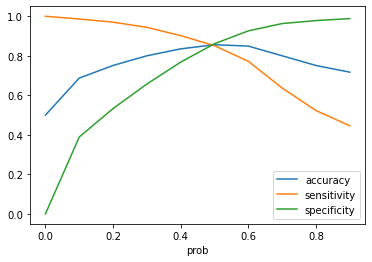

In [258]:
find_optimal_cutoff(X_train, y_train, y_train_pred_lr)

In [279]:
# From above graph 0.5 is optimal cutoff
metric_lr = calculate_proba_model_metrics(0.5, X_train, X_test, y_train, y_train_pred_lr, y_test, y_test_pred_lr)
print_scores('Logistic Regression', metric_lr)
lr_metric = pd.Series(metric_lr, name = 'Logistic Regression')
score_metric = pd.concat([score_metric, lr_metric], axis = 1)

Model -  Logistic Regression

Train scores : 
Accuracy                                  : 0.856 
Sensitivity / True Positive Rate / Recall : 0.851 
Specificity / True Negative Rate          : 0.861 
Precision / Positive Predictive Value     : 0.86 
F1-score                                  : 0.855

Test scores : 
Accuracy                                  : 0.853 
Sensitivity / True Positive Rate / Recall : 0.756 
Specificity / True Negative Rate          : 0.863 
Precision / Positive Predictive Value     : 0.38 
F1-score                                  : 0.506


#### Logistic Regression with RFE Model

In [260]:
from sklearn.feature_selection import RFE

lr = LogisticRegression(random_state=39)
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe_results = rfe.fit(X_train, y_train)

In [261]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X_train.columns.to_list(), 'Rank' : rfe_results.ranking_, 
                                      'Support' :  rfe_results.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

Column  Rank  Support
14              roam_og_mou_8     1     True
27           std_og_t2t_mou_6     1     True
73           total_rech_num_7     1     True
74           total_rech_num_8     1     True
30           std_og_t2m_mou_6     1     True
..                        ...   ...      ...
67               isd_ic_mou_7   109    False
123         sachet_3g_7_other   110    False
126  high_value_customer_True   111    False
38               isd_og_mou_8   112    False
66               isd_ic_mou_6   113    False

[127 rows x 3 columns]

In [262]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['roam_og_mou_8',
 'std_og_t2t_mou_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'std_og_t2m_mou_6',
 'onnet_mou_8',
 'loc_og_t2m_mou_8',
 'last_day_rch_amt_8',
 'loc_ic_t2t_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_og_t2t_mou_8',
 'roam_og_mou_7',
 'loc_ic_t2f_mou_8']

In [263]:
lr_with_rfe = LogisticRegression(random_state=39)
lr_with_rfe = lr_with_rfe.fit(X_train[rfe_selected_columns], y_train)

y_train_pred_lr_rfe = lr_with_rfe.predict_proba(X_train[rfe_selected_columns])
y_test_pred_lr_rfe  = lr_with_rfe.predict_proba(X_test[rfe_selected_columns])

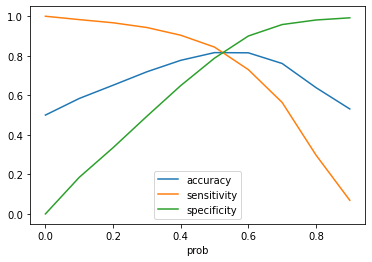

In [264]:
find_optimal_cutoff(X_train, y_train, y_train_pred_lr_rfe)

In [281]:
# From above graph 0.5 is optimal cutoff
metric_lr_with_rfe = calculate_proba_model_metrics(0.5, X_train, X_test, y_train, y_train_pred_lr_rfe, y_test, y_test_pred_lr_rfe)
print_scores('Logistic Regression With RFE', metric_lr_with_rfe)
lr_with_rfe_metric = pd.Series(metric_lr_with_rfe, name = 'Logistic Regression With RFE')
score_metric = pd.concat([score_metric, lr_with_rfe_metric], axis = 1)

Model -  Logistic Regression With RFE

Train scores : 
Accuracy                                  : 0.816 
Sensitivity / True Positive Rate / Recall : 0.844 
Specificity / True Negative Rate          : 0.788 
Precision / Positive Predictive Value     : 0.8 
F1-score                                  : 0.821

Test scores : 
Accuracy                                  : 0.798 
Sensitivity / True Positive Rate / Recall : 0.839 
Specificity / True Negative Rate          : 0.793 
Precision / Positive Predictive Value     : 0.31 
F1-score                                  : 0.453


#### Decision Tree Model

In [266]:
!pip install six

In [267]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [268]:
# Define function that is used multiple times
def get_tree_graph(tree, columns) :
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,
                    feature_names=columns, 
                    class_names=['No Churn', "Churn"])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [269]:
dt = DecisionTreeClassifier(max_depth=3, random_state=39)
dt.fit(X_train, y_train)

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

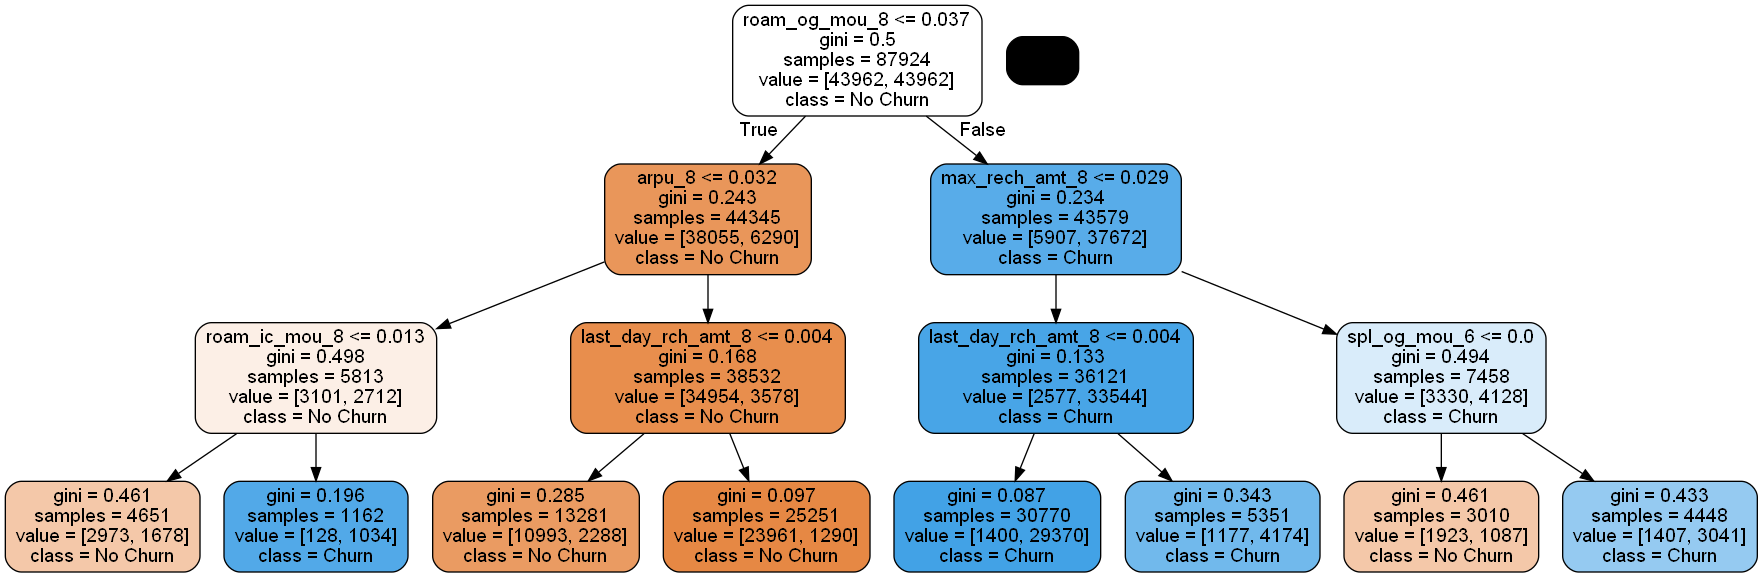

In [270]:
graph = get_tree_graph(dt, X_train.columns)
Image(graph.create_png())

In [282]:
metric_dt = calculate_model_metrics(y_train, y_train_pred_dt, y_test, y_test_pred_dt)
print_scores('Decision Tree', metric_dt)
dt_metric = pd.Series(metric_dt, name = 'Decision Tree')
score_metric = pd.concat([score_metric, dt_metric], axis = 1)

Model -  Decision Tree

Train scores : 
Accuracy                                  : 0.881 
Sensitivity / True Positive Rate / Recall : 0.856 
Specificity / True Negative Rate          : 0.906 
Precision / Positive Predictive Value     : 0.901 
F1-score                                  : 0.878

Test scores : 
Accuracy                                  : 0.89 
Sensitivity / True Positive Rate / Recall : 0.721 
Specificity / True Negative Rate          : 0.909 
Precision / Positive Predictive Value     : 0.466 
F1-score                                  : 0.566


#### Decision Tree Model with Hyper-parameter tuning

In [272]:
# Import required libraries
from sklearn.model_selection import GridSearchCV

In [33]:
dt = DecisionTreeClassifier(random_state=39)

# Tune model on below parameters
params = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [20, 50, 100],
    'min_samples_split': [20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [34]:
# Grid Search will build multiple models and find the best one based on scoring method
# using recall as scoring method
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=39), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [20, 50, 100],
                         'min_samples_split': [20, 50, 100]},
             scoring='recall', verbose=1)

In [35]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.768695      0.075171         0.137075        0.005562   
1       4.750008      0.076900         0.140499        0.008993   
2       4.776412      0.052516         0.147530        0.012629   
3       4.962744      0.035863         0.172019        0.045346   
4       5.493490      0.402086         0.157941        0.018174   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                     20   
1            gini               2                     20   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                     50   

  param_min_samples_split                                             params  \
0                      20  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
1                      50  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
2                     100  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
3                      20  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   
4                      50  {'criterion': 'gini', 'max_depth': 2, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.849227            0.87252           0.870439           0.872714   
1           0.849227            0.87252           0.870439           0.872714   
2           0.849227            0.87252           0.870439           0.872714   
3           0.849227            0.87252           0.870439           0.872714   
4           0.849227            0.87252           0.870439           0.872714   

   mean_test_score  std_test_score  rank_test_score  
0         0.866225        0.009855               46  
1         0.866225        0.009855               46  
2         0.866225        0.009855               46  
3         0.866225        0.009855               46  
4         0.866225        0.009855               46

In [36]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20,
                       min_samples_split=20, random_state=39)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.497767 to fit



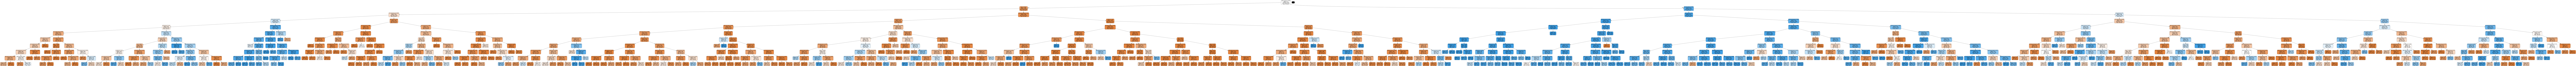

In [37]:
# Build decision tree using best estimated parameters
dt_tuned = DecisionTreeClassifier(max_depth=10,min_samples_leaf=20,min_samples_split=20,criterion="entropy",random_state=39)
dt_tuned.fit(X_train, y_train)

y_train_pred_dt_tuned = dt_tuned.predict(X_train)
y_test_pred_dt_tuned = dt_tuned.predict(X_test)

graph = get_tree_graph(dt_tuned, X_train.columns)
Image(graph.create_png())

In [283]:
metric_dt_tuned = calculate_model_metrics(y_train, y_train_pred_dt_tuned, y_test, y_test_pred_dt_tuned)
print_scores('Decision Tree Tuned', metric_dt_tuned)
dt_tuned_metric = pd.Series(metric_dt_tuned, name = 'Decision Tree Tuned')
score_metric = pd.concat([score_metric, dt_tuned_metric], axis = 1)

Model -  Decision Tree Tuned

Train scores : 
Accuracy                                  : 0.927 
Sensitivity / True Positive Rate / Recall : 0.927 
Specificity / True Negative Rate          : 0.928 
Precision / Positive Predictive Value     : 0.928 
F1-score                                  : 0.927

Test scores : 
Accuracy                                  : 0.897 
Sensitivity / True Positive Rate / Recall : 0.725 
Specificity / True Negative Rate          : 0.916 
Precision / Positive Predictive Value     : 0.487 
F1-score                                  : 0.583


#### Random Forest Model

In [273]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier

In [274]:
rf = RandomForestClassifier(random_state=39, n_estimators=10, max_depth=3)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

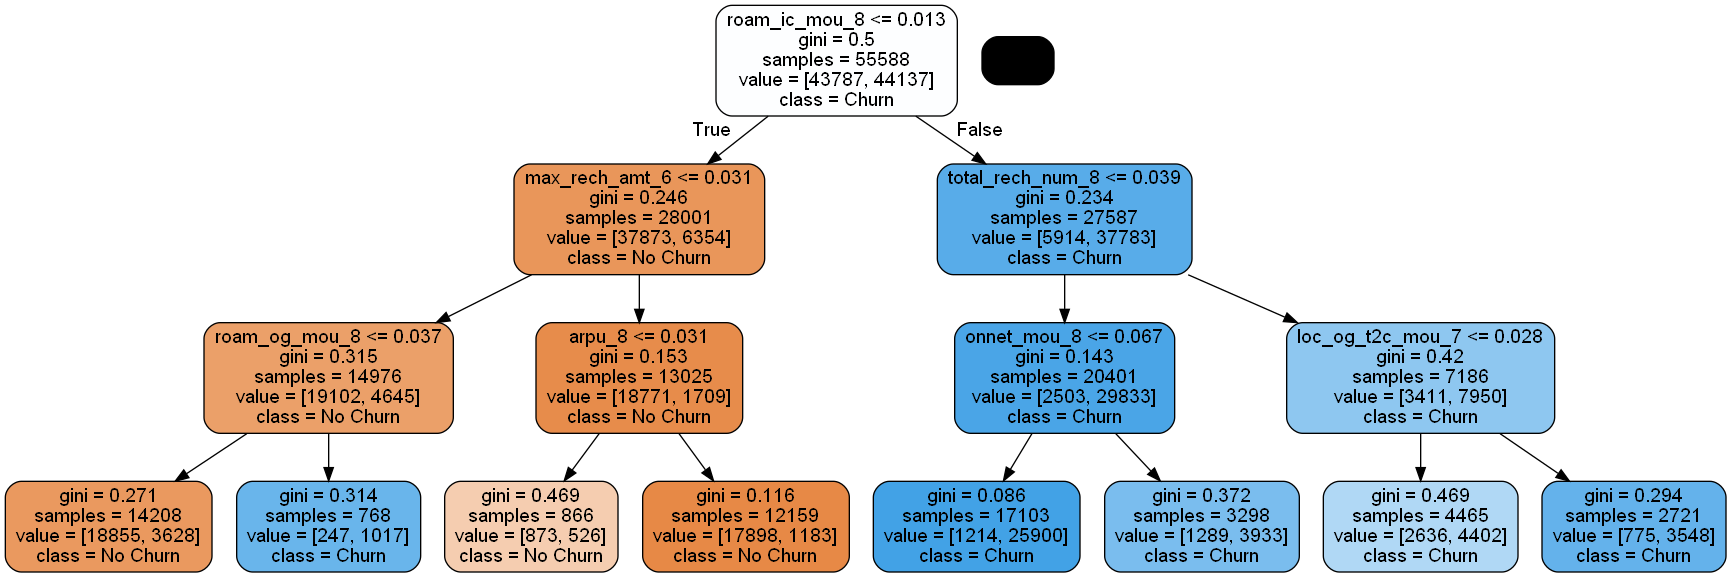

In [275]:
# we have 10 estimators, Plot first graph
# Graph_0
gph = get_tree_graph(rf.estimators_[0], X_train.columns)
Image(gph.create_png())

In [284]:
metric_rf = calculate_model_metrics(y_train, y_train_pred_rf, y_test, y_test_pred_rf)
print_scores('Random Forest', metric_rf)
rf_metric = pd.Series(metric_rf, name = 'Random Forest')
score_metric = pd.concat([score_metric, rf_metric], axis = 1)

Model -  Random Forest

Train scores : 
Accuracy                                  : 0.868 
Sensitivity / True Positive Rate / Recall : 0.808 
Specificity / True Negative Rate          : 0.928 
Precision / Positive Predictive Value     : 0.919 
F1-score                                  : 0.86

Test scores : 
Accuracy                                  : 0.908 
Sensitivity / True Positive Rate / Recall : 0.717 
Specificity / True Negative Rate          : 0.929 
Precision / Positive Predictive Value     : 0.527 
F1-score                                  : 0.607


#### Random Forest Model with Hyper-parameter tuning

In [43]:
# Import required libraries
from sklearn.model_selection import GridSearchCV

In [44]:
rf = RandomForestClassifier(random_state=39)

# Tune model on below parameters
params = {
    'max_depth': [10,15,20],
    'min_samples_leaf': [20, 50, 100],
    'max_features': [4,5],
    'n_estimators': [20, 50]
}

In [45]:
# Grid Search will build multiple models and find the best one based on scoring method
# using recall as scoring method
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=39), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'max_features': [4, 5],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [20, 50]},
             scoring='recall', verbose=1)

In [46]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=20,
                       n_estimators=50, random_state=39)

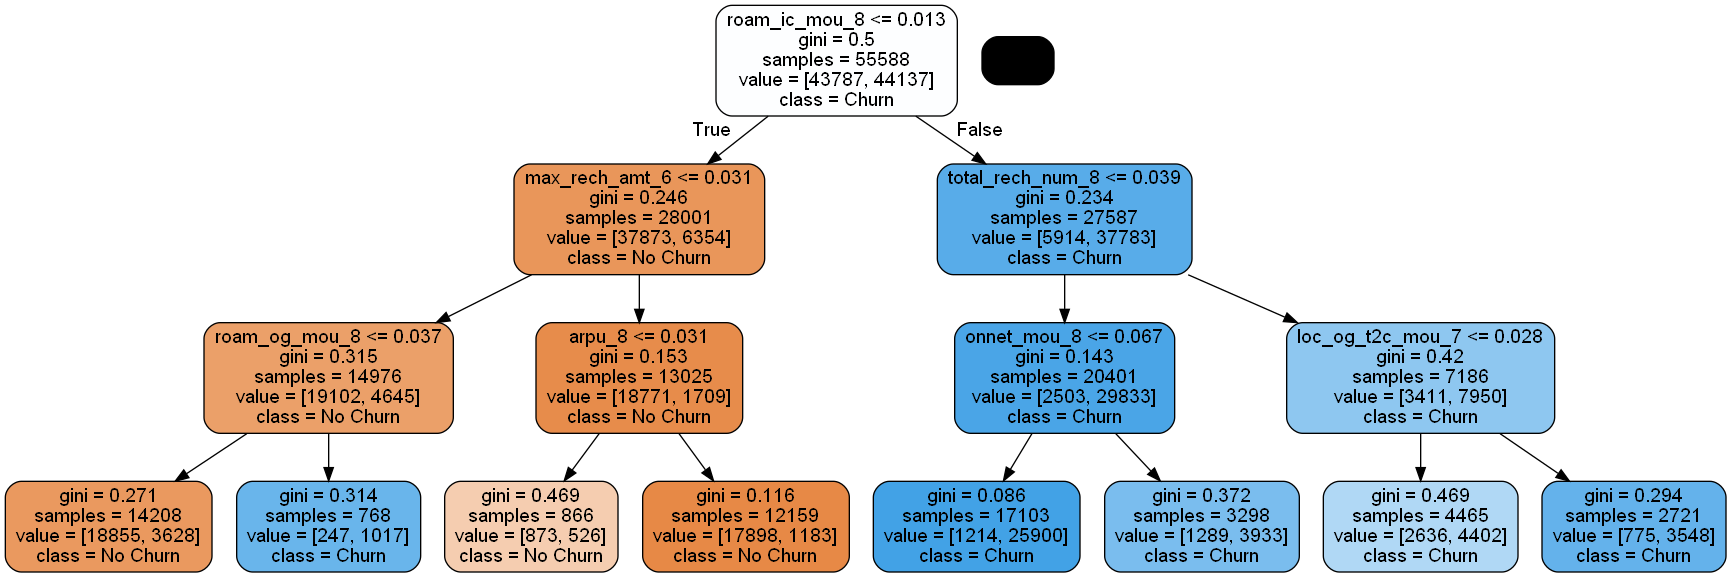

In [47]:
# Build Random forest using best estimated parameters
rf_tuned = RandomForestClassifier(random_state=39,max_depth=20,min_samples_leaf=20,max_features=5,n_estimators=50)
rf_tuned.fit(X_train, y_train)

y_train_pred_rf_tuned = rf_tuned.predict(X_train)
y_test_pred_rf_tuned = rf_tuned.predict(X_test)

graph = get_tree_graph(rf_tuned.estimators_[0], X_train.columns)
Image(gph.create_png())

In [285]:
metric_rf_tuned = calculate_model_metrics(y_train, y_train_pred_rf_tuned, y_test, y_test_pred_rf_tuned)
print_scores('Random Forest Tuned', metric_rf_tuned)
rf_tuned_metric = pd.Series(metric_rf_tuned, name = 'Random Forest Tuned')
score_metric = pd.concat([score_metric, rf_tuned_metric], axis = 1)

Model -  Random Forest Tuned

Train scores : 
Accuracy                                  : 0.94 
Sensitivity / True Positive Rate / Recall : 0.931 
Specificity / True Negative Rate          : 0.949 
Precision / Positive Predictive Value     : 0.948 
F1-score                                  : 0.939

Test scores : 
Accuracy                                  : 0.922 
Sensitivity / True Positive Rate / Recall : 0.74 
Specificity / True Negative Rate          : 0.942 
Precision / Positive Predictive Value     : 0.585 
F1-score                                  : 0.653


In [49]:
# Find important variables
pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_tuned.feature_importances_
}).sort_values(by="Imp", ascending=False).head(15)

Varname       Imp
11       roam_ic_mou_8  0.132029
14       roam_og_mou_8  0.118786
47    loc_ic_t2t_mou_8  0.061799
17    loc_og_t2t_mou_8  0.052690
2               arpu_8  0.048116
77      max_rech_amt_8  0.038805
38        isd_og_mou_8  0.030178
80  last_day_rch_amt_8  0.026496
20    loc_og_t2m_mou_8  0.024562
50    loc_ic_t2m_mou_8  0.023831
13       roam_og_mou_7  0.022700
56    std_ic_t2t_mou_8  0.020559
74    total_rech_num_8  0.019779
65        spl_ic_mou_8  0.017579
10       roam_ic_mou_7  0.016971

#### Adaboost Model

In [50]:
# Import required libraries
from sklearn.ensemble import AdaBoostClassifier

In [51]:
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=39)
adaboost.fit(X_train, y_train)

y_train_pred_adaboost = adaboost.predict(X_train)
y_test_pred_adaboost = adaboost.predict(X_test)

In [286]:
metric_adaboost = calculate_model_metrics(y_train, y_train_pred_adaboost, y_test, y_test_pred_adaboost)
print_scores('Adaboost', metric_adaboost)
adaboost_metric = pd.Series(metric_adaboost, name = 'Adaboost')
score_metric = pd.concat([score_metric, adaboost_metric], axis = 1)

Model -  Adaboost

Train scores : 
Accuracy                                  : 0.94 
Sensitivity / True Positive Rate / Recall : 0.941 
Specificity / True Negative Rate          : 0.94 
Precision / Positive Predictive Value     : 0.94 
F1-score                                  : 0.94

Test scores : 
Accuracy                                  : 0.915 
Sensitivity / True Positive Rate / Recall : 0.688 
Specificity / True Negative Rate          : 0.94 
Precision / Positive Predictive Value     : 0.562 
F1-score                                  : 0.619


#### XGboost Model

In [53]:
# Import required libraries
!pip3 install xgboost --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --user
import xgboost as xgb

In [310]:
xgboost = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgboost.fit(X_train, y_train)

y_train_pred_xgboost = xgboost.predict(X_train)
y_test_pred_xgboost = xgboost.predict(X_test)

In [311]:
metric_xgboost = calculate_model_metrics(y_train, y_train_pred_xgboost, y_test, y_test_pred_xgboost)
print_scores('XGboost', metric_xgboost)
xgboost_metric = pd.Series(metric_xgboost, name = 'XGboost')
score_metric = pd.concat([score_metric, xgboost_metric], axis = 1)

Model -  XGboost

Train scores : 
Accuracy                                  : 0.986 
Sensitivity / True Positive Rate / Recall : 0.981 
Specificity / True Negative Rate          : 0.99 
Precision / Positive Predictive Value     : 0.99 
F1-score                                  : 0.985

Test scores : 
Accuracy                                  : 0.946 
Sensitivity / True Positive Rate / Recall : 0.663 
Specificity / True Negative Rate          : 0.978 
Precision / Positive Predictive Value     : 0.766 
F1-score                                  : 0.711


In [312]:
# Find important variables
pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": xgboost.feature_importances_
}).sort_values(by="Imp", ascending=False).head(15)

Varname       Imp
14        roam_og_mou_8  0.206402
11        roam_ic_mou_8  0.132114
77       max_rech_amt_8  0.038022
96     monthly_2g_8_1.0  0.023874
65         spl_ic_mou_8  0.021316
80   last_day_rch_amt_8  0.021202
114    monthly_3g_7_1.0  0.020415
101   sachet_2g_6_other  0.018560
103     sachet_2g_7_2.0  0.016773
99      sachet_2g_6_2.0  0.016739
94     monthly_2g_7_1.0  0.014893
2                arpu_8  0.014667
92     monthly_2g_6_1.0  0.013869
98      sachet_2g_6_1.0  0.012982
50     loc_ic_t2m_mou_8  0.012606

#### XGBoost with tuning

In [56]:
# Import required libraries
from sklearn.model_selection import RandomizedSearchCV

In [57]:
xgboost = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

# Tune model on below parameters
params = {
        'n_estimators' : [50, 100],
        'learning_rate' : [0.02, 0.1],
        'max_depth': [3, 5, 10]
        }

In [58]:
random_search = RandomizedSearchCV(xgboost, 
                                   param_distributions=params, 
                                   n_iter=10,
                                   scoring='recall', 
                                   n_jobs=-1, cv=4, verbose=1, random_state=39)

random_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.02, 0.1],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [50, 100]},
                   random_state=39, scoring='recall', verbose=1)

In [59]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [60]:
# Build XG Boost with best parameters
xgboost_tuned = random_search.best_estimator_
xgboost_tuned.fit(X_train, y_train)

y_train_pred_xgboost_tuned = xgboost_tuned.predict(X_train)
y_test_pred_xgboost_tuned = xgboost_tuned.predict(X_test)

In [288]:
metric_xgboost_tuned = calculate_model_metrics(y_train, y_train_pred_xgboost_tuned, y_test, y_test_pred_xgboost_tuned)
print_scores('XGboost Tuned', metric_xgboost_tuned)
xgboost_tuned_metric = pd.Series(metric_xgboost_tuned, name = 'XGboost Tuned')
score_metric = pd.concat([score_metric, xgboost_tuned_metric], axis = 1)

Model -  XGboost Tuned

Train scores : 
Accuracy                                  : 0.985 
Sensitivity / True Positive Rate / Recall : 0.984 
Specificity / True Negative Rate          : 0.985 
Precision / Positive Predictive Value     : 0.985 
F1-score                                  : 0.984

Test scores : 
Accuracy                                  : 0.94 
Sensitivity / True Positive Rate / Recall : 0.7 
Specificity / True Negative Rate          : 0.967 
Precision / Positive Predictive Value     : 0.7 
F1-score                                  : 0.7


In [62]:
# Find important variables
pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": xgboost_tuned.feature_importances_
}).sort_values(by="Imp", ascending=False).head(15)

Varname       Imp
14        roam_og_mou_8  0.322793
11        roam_ic_mou_8  0.128791
77       max_rech_amt_8  0.035242
65         spl_ic_mou_8  0.020679
80   last_day_rch_amt_8  0.017736
2                arpu_8  0.016058
50     loc_ic_t2m_mou_8  0.013617
96     monthly_2g_8_1.0  0.011752
111   sachet_2g_8_other  0.011540
40         spl_og_mou_7  0.009826
42          og_others_6  0.009779
112    monthly_3g_6_1.0  0.009586
74     total_rech_num_8  0.009556
125   sachet_3g_8_other  0.008694
107     sachet_2g_8_1.0  0.008199

#### PCA

In [289]:
# Import required libraries
from sklearn.decomposition import PCA

In [290]:
pca = PCA(random_state=39)

pca.fit(X_train)
pca.components_

array([[ 2.13053664e-02,  2.40031724e-02,  2.42663581e-02, ...,
         2.49227432e-02,  1.44014987e-02,  8.38735816e-01],
       [ 1.83913079e-02,  8.26616235e-03,  5.26063799e-03, ...,
        -1.11104357e-02, -7.38812014e-04,  4.89522364e-01],
       [-4.14225653e-03, -3.31127722e-03,  1.45139759e-03, ...,
         4.95543675e-02,  9.45677233e-03, -1.16139325e-01],
       ...,
       [ 1.32864850e-03, -8.56832342e-03, -5.93285315e-03, ...,
         2.03309164e-05,  9.62191911e-06,  1.08151217e-04],
       [ 1.82217706e-03, -3.97499372e-03,  2.72153290e-03, ...,
        -1.11110560e-05, -6.64454622e-06, -1.58903709e-05],
       [ 7.56953708e-04,  4.70837764e-04, -2.86785376e-03, ...,
         9.36820563e-06,  3.27932762e-05,  4.89926726e-07]])

In [291]:
pca.explained_variance_ratio_

array([2.08478358e-01, 1.19992509e-01, 7.21701268e-02, 4.93134819e-02,
       4.72193832e-02, 4.18356843e-02, 4.13018540e-02, 3.81372416e-02,
       2.73300192e-02, 2.50510458e-02, 2.31385581e-02, 2.21979288e-02,
       2.02243139e-02, 1.93087993e-02, 1.79224914e-02, 1.70668876e-02,
       1.58873544e-02, 1.40049229e-02, 1.26024440e-02, 1.20487699e-02,
       1.18290836e-02, 1.17468111e-02, 1.06407978e-02, 1.00691396e-02,
       9.36096261e-03, 8.79388758e-03, 7.24243883e-03, 6.79041218e-03,
       5.43813541e-03, 5.30635212e-03, 5.07547913e-03, 4.60871942e-03,
       4.51154500e-03, 4.31779699e-03, 4.20605328e-03, 4.00507676e-03,
       3.09899726e-03, 3.00966102e-03, 3.00066169e-03, 2.92392101e-03,
       2.72774575e-03, 2.48621597e-03, 2.01888998e-03, 1.60866162e-03,
       1.40786874e-03, 1.23042893e-03, 1.00668135e-03, 9.49411363e-04,
       8.81578955e-04, 8.16838059e-04, 7.74057386e-04, 7.58351333e-04,
       7.12908408e-04, 6.31342668e-04, 5.44847346e-04, 5.36276996e-04,
      

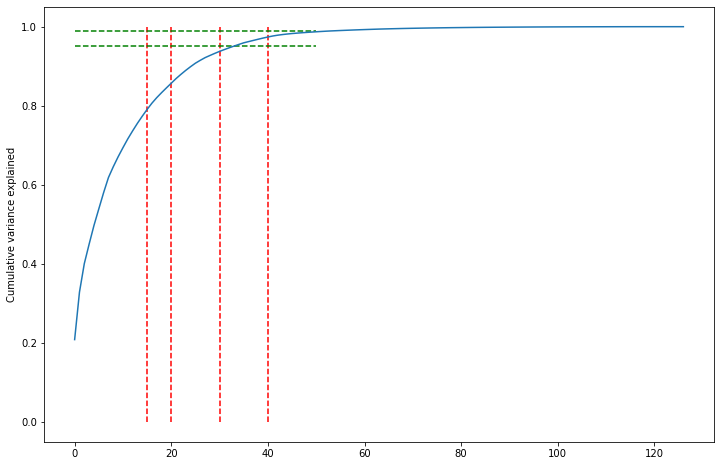

In [295]:
#Plot scree plot
var_cumsum = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=50, xmin=0, colors="g", linestyles="--")
plt.hlines(y=0.99, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumsum)
plt.ylabel("Cumulative variance explained")
plt.show()

In [296]:
# From above about 40 components are explaining all variance in data
# so builidng a model with 40 components

In [297]:
from sklearn.decomposition import IncrementalPCA

In [298]:
pca_final = IncrementalPCA(n_components=40)
X_train_pca = pd.DataFrame(pca_final.fit_transform(X_train))
X_train_pca.shape

(87924, 40)

In [299]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(40, 40)

<AxesSubplot:>

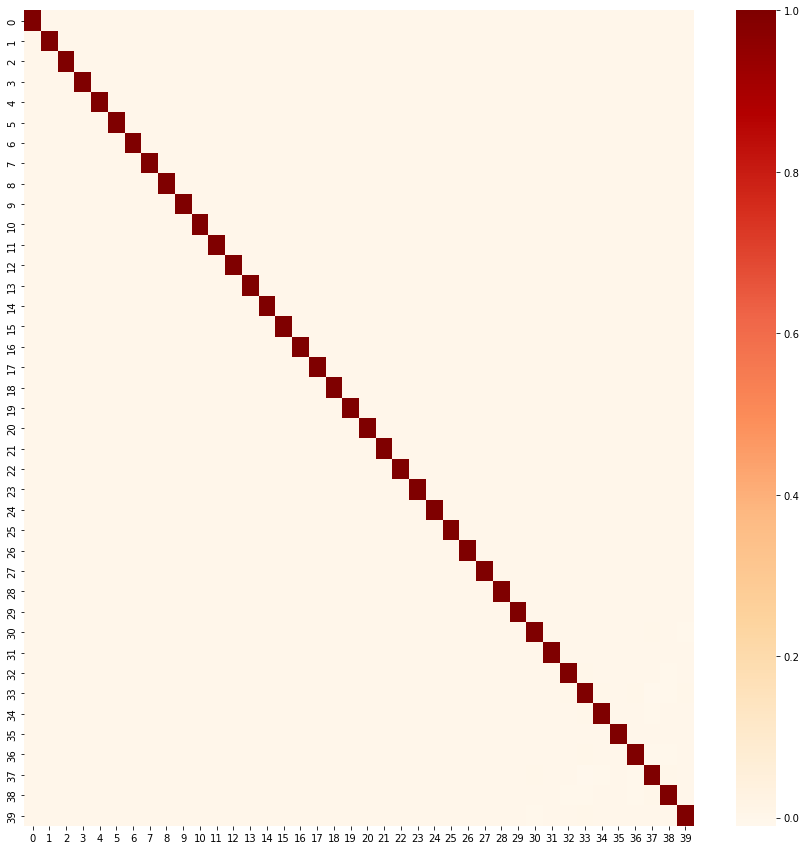

In [301]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, cmap="OrRd", annot = False)

Above shows data is no longer correlated

In [302]:
# Apply transformation on test dataset and build a model from there
X_test_pca = pd.DataFrame(pca_final.transform(X_test))
X_test_pca.shape

(21000, 40)

#### Logistic regression model on Principal Components identified by PCA

In [303]:
from sklearn.linear_model import LogisticRegression

lr_pca = LogisticRegression(random_state=39)
lr_pca = lr_pca.fit(X_train_pca, y_train)

y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_test_pred_lr_pca  = lr_pca.predict(X_test_pca)

In [304]:
metric_lr_pca = calculate_model_metrics(y_train, y_train_pred_lr_pca, y_test, y_test_pred_lr_pca)
print_scores('Logistic regression with PCA', metric_lr_pca)
lr_pca_metric = pd.Series(metric_lr_pca, name = 'Logistic regression with PCA')
score_metric = pd.concat([score_metric, lr_pca_metric], axis = 1)

Model -  Logistic regression with PCA

Train scores : 
Accuracy                                  : 0.786 
Sensitivity / True Positive Rate / Recall : 0.807 
Specificity / True Negative Rate          : 0.765 
Precision / Positive Predictive Value     : 0.774 
F1-score                                  : 0.79

Test scores : 
Accuracy                                  : 0.764 
Sensitivity / True Positive Rate / Recall : 0.727 
Specificity / True Negative Rate          : 0.768 
Precision / Positive Predictive Value     : 0.257 
F1-score                                  : 0.38


#### XG Boost on Principal Components identified by PCA

In [305]:
xgboost_pca = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgboost_pca.fit(X_train_pca, y_train)

y_train_pred_xgboost_pca = xgboost_pca.predict(X_train_pca)
y_test_pred_xgboost_pca = xgboost_pca.predict(X_test_pca)

In [306]:
metric_xgboost_pca = calculate_model_metrics(y_train, y_train_pred_xgboost_pca, y_test, y_test_pred_xgboost_pca)
print_scores('XGboost PCA', metric_xgboost_pca)
xgboost_pca_metric = pd.Series(metric_xgboost_pca, name = 'XGboost PCA')
score_metric = pd.concat([score_metric, xgboost_pca_metric], axis = 1)

Model -  XGboost PCA

Train scores : 
Accuracy                                  : 0.93 
Sensitivity / True Positive Rate / Recall : 0.928 
Specificity / True Negative Rate          : 0.932 
Precision / Positive Predictive Value     : 0.932 
F1-score                                  : 0.93

Test scores : 
Accuracy                                  : 0.878 
Sensitivity / True Positive Rate / Recall : 0.663 
Specificity / True Negative Rate          : 0.902 
Precision / Positive Predictive Value     : 0.429 
F1-score                                  : 0.521


### Model Comparison

In [307]:
# Comparing Scores from various models

Metric  Logistic Regression  \
0             Accuracy (Train)                0.856   
1  Sensitivity/ Recall (Train)                0.851   
2          Specificity (Train)                0.861   
3            Precision (Train)                0.860   
4             F1-score (Train)                0.855   
5              Accuracy (Test)                0.853   
6   Sensitivity/ Recall (Test)                0.756   
7           Specificity (Test)                0.863   
8             Precision (Test)                0.380   
9              F1-score (Test)                0.506   

   Logistic Regression With RFE  Decision Tree  Decision Tree Tuned  \
0                         0.816          0.881                0.927   
1                         0.844          0.856                0.927   
2                         0.788          0.906                0.928   
3                         0.800          0.901                0.928   
4                         0.821          0.878                0.927   
5                         0.798          0.890                0.897   
6                         0.839          0.721                0.725   
7                         0.793          0.909                0.916   
8                         0.310          0.466                0.487   
9                         0.453          0.566                0.583   

   Random Forest  Random Forest Tuned  Adaboost  XGboost  XGboost Tuned  \
0          0.868                0.940     0.940    0.986          0.985   
1          0.808                0.931     0.941    0.981          0.984   
2          0.928                0.949     0.940    0.990          0.985   
3          0.919                0.948     0.940    0.990          0.985   
4          0.860                0.939     0.940    0.985          0.984   
5          0.908                0.922     0.915    0.946          0.940   
6          0.717                0.740     0.688    0.663          0.700   
7          0.929                0.942     0.940    0.978          0.967   
8          0.527                0.585     0.562    0.766          0.700   
9          0.607                0.653     0.619    0.711          0.700   

   Logistic regression with PCA  XGboost PCA  
0                         0.786        0.930  
1                         0.807        0.928  
2                         0.765        0.932  
3                         0.774        0.932  
4                         0.790        0.930  
5                         0.764        0.878  
6                         0.727        0.663  
7                         0.768        0.902  
8                         0.257        0.429  
9                         0.380        0.521

#### Score observatrions on test data
- XGBoost model achieved best accuracy score of **0.946**
- Logistic Regerssion with RFE acheived best Recall score of **0.839**
- XG Boost has best Specificity score of **0.978**
- XG Boost has bsest F1-Score **0.711**
- XG Boost is most precise with score **0.766**

XG-Boost is overall winner with best score metrics.

### Final Recommendations

- Choosing model XGboost and XGboost PCA based on good evaluation scores

- Important features for predicting Churn customer

In [313]:
# Important features predicted by Best performing model - XG Boost
pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": xgboost.feature_importances_
}).sort_values(by="Imp", ascending=False).head(15)

Varname       Imp
14        roam_og_mou_8  0.206402
11        roam_ic_mou_8  0.132114
77       max_rech_amt_8  0.038022
96     monthly_2g_8_1.0  0.023874
65         spl_ic_mou_8  0.021316
80   last_day_rch_amt_8  0.021202
114    monthly_3g_7_1.0  0.020415
101   sachet_2g_6_other  0.018560
103     sachet_2g_7_2.0  0.016773
99      sachet_2g_6_2.0  0.016739
94     monthly_2g_7_1.0  0.014893
2                arpu_8  0.014667
92     monthly_2g_6_1.0  0.013869
98      sachet_2g_6_1.0  0.012982
50     loc_ic_t2m_mou_8  0.012606

roam_og_mou_8, roam_ic_mou_8, max_rech_amt_8, monthly_2g_8_1.0, spl_ic_mou_8, last_day_rch_amt_8, monthly_3g_7_1.0, sachet_2g_6_other, sachet_2g_7_2.0, sachet_2g_6_2.0 are top 10 important features

- Customers who use outgoing calls, incoming calls, maximum recharge amount all in 8th month (Final month of data) gives a good indication if user is going to churn in near future
- top 2 features belong to roaming outgoing and roaming incoming minutes of usage. These are strong indicators of churn behaviour
- Top 6 important features belong to last month usage data (Month 8)
- Sachet 2g services use also contributes significantly in customer churn prediction
- 8 aout of above 15 features belong to month 8 data

Company should keep a close eye, if user has not recharged in last month, or have reduced incoming and outgoing calls, roaming usage, They are most likely to churn

In [351]:
X_train.columns.tolist()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 

### Predict Churn for unseen Test data using XGBoost Model

In [363]:
# Load given dataset day.csv file in dataset variable
test_dataset = pd.read_csv("test.csv")
test_dataset.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [364]:
test_dataset.shape

(30000, 171)

In [365]:
# Derive Features
test_dataset['total_rech_amt'] = test_dataset['total_rech_amt_6'] + test_dataset['total_rech_amt_7'] + test_dataset['total_rech_amt_8']

In [366]:
test_dataset['total_rech_amt'].describe(percentiles=[.70])

count    30000.000000
mean       975.269833
std       1030.233604
min          0.000000
50%        686.000000
70%       1086.300000
max      51500.000000
Name: total_rech_amt, dtype: float64

In [367]:
high_value_customer = []
for row in test_dataset['total_rech_amt']:
    if row >= 1086.0:
        high_value_customer.append(True)
    else:
        high_value_customer.append(False)

test_dataset['high_value_customer'] = high_value_customer

In [368]:
# Drop Columns
test_dataset.drop(columns_dropped, axis = 1, inplace=True)
test_dataset.shape

(30000, 105)

In [369]:
# Handle nulls
test_dataset.isnull().sum().sum()

92368

In [370]:
# Impute nulls
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

test_imputer = IterativeImputer(random_state=39)
test_imputer.fit(test_dataset)

imputed_with_imputer_test_dataset = pd.DataFrame(test_imputer.transform(test_dataset), columns = test_dataset.columns)

imputed_with_imputer_test_dataset.shape

(30000, 105)

In [371]:
total_values = test_dataset.shape[0] * test_dataset.shape[1]
null_values = imputed_with_imputer_test_dataset.isnull().sum().sum()

percentage_missing = null_values / total_values * 100
print('Percentage data missing: ', percentage_missing.round(2), "%")

Percentage data missing:  0.0 %


In [372]:
test_dataset = imputed_with_imputer_test_dataset

In [373]:
total_values = test_dataset.shape[0] * test_dataset.shape[1]
null_values = test_dataset.isnull().sum().sum()

percentage_missing = null_values / total_values * 100
print('Percentage data missing: ', percentage_missing.round(2), "%")

Percentage data missing:  0.0 %


In [374]:
test_dataset.shape

(30000, 105)

In [380]:
# Group some categories
category_columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
                    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 
                    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 
                    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']

for col in category_columns :
    category_counts = 100 * test_dataset[col].value_counts(normalize=True)
    categories_with_low_count = category_counts[category_counts <= 1].index.to_list()
    if(col == 'sachet_2g_6'):
        categories_with_low_count.append(4.0)    
    print('Replaced', categories_with_low_count, 'in ', col, 'with category: other')
    test_dataset[col].replace(categories_with_low_count, 'other', inplace=True)

Replaced [2.0, 3.0, 4.0] in  monthly_2g_6 with category: other
Replaced [2.0, 3.0, 4.0, 5.0] in  monthly_2g_7 with category: other
Replaced [2.0, 3.0, 4.0, 5.0] in  monthly_2g_8 with category: other
Replaced [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 11.0, 13.0, 14.0, 15.0, 18.0, 17.0, 19.0, 20.0, 22.0, 16.0, 24.0, 21.0, 27.0, 39.0, 4.0] in  sachet_2g_6 with category: other
Replaced [5.0, 6.0, 8.0, 7.0, 9.0, 10.0, 11.0, 12.0, 13.0, 16.0, 14.0, 18.0, 15.0, 17.0, 20.0, 29.0, 24.0, 28.0, 19.0, 30.0] in  sachet_2g_7 with category: other
Replaced [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14.0, 13.0, 15.0, 16.0, 19.0, 18.0, 24.0, 25.0, 17.0, 20.0, 34.0, 21.0, 33.0, 26.0] in  sachet_2g_8 with category: other
Replaced [2.0, 3.0, 5.0, 4.0, 11.0, 6.0, 7.0, 14.0, 8.0] in  monthly_3g_6 with category: other
Replaced [3.0, 4.0, 5.0, 6.0, 7.0, 11.0, 12.0, 8.0, 9.0] in  monthly_3g_7 with category: other
Replaced [3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0] in  monthly_3g_8 with category: other
Replaced [2.0, 3.0

In [381]:
# Convert all categorical columns into categorical data type.
category_columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
                    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 
                    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 
                    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 
                    'high_value_customer']

test_dataset[category_columns] = test_dataset[category_columns].astype('category')

In [382]:
# Create dummies
category_columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
                    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 
                    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 
                    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 
                    'high_value_customer']

for col in category_columns:
    datasetCol = pd.get_dummies(test_dataset[col], prefix = col, drop_first=True)
    test_dataset = pd.concat([test_dataset, datasetCol], axis = 1)
    test_dataset.drop(col, axis = 1, inplace = True)

test_dataset.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   91.882   65.330   64.445        31.78        20.23        23.11   
1  414.168  515.568  360.868        75.51        41.21        19.84   
2  329.844  434.884  746.239         7.54         7.86         8.40   
3   43.550  171.390   24.400         5.31         2.16         0.00   
4  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0         60.16         32.16         34.83           0.00  ...   
1        474.34        621.84        394.94           0.00  ...   
2         16.98         45.81         45.04          22.81  ...   
3         40.04        205.01         24.01           0.00  ...   
4         60.94         23.84         74.16           0.00  ...   

   monthly_3g_8_1.0  monthly_3g_8_2.0  monthly_3g_8_other  sachet_3g_6_1.0  \
0                 0                 0                   0                0   
1                 0                 0                   0                0   
2                 0                 0                   0                0   
3                 0                 0                   0                0   
4                 0                 0                   0                0   

   sachet_3g_6_other  sachet_3g_7_1.0  sachet_3g_7_other  sachet_3g_8_1.0  \
0                  0                0                  0                0   
1                  0                0                  0                0   
2                  0                0                  0                0   
3                  0                0                  0                0   
4                  0                0                  0                0   

   sachet_3g_8_other  high_value_customer_1.0  
0                  0                        0  
1                  0                        1  
2                  0                        1  
3                  0                        0  
4                  0                        1  

[5 rows x 127 columns]

In [383]:
test_dataset['high_value_customer_True'] = test_dataset['high_value_customer_1.0']
test_dataset.drop('high_value_customer_1.0', axis = 1, inplace=True)
test_dataset.shape

(30000, 127)

In [384]:
# Scale
numeric_columns = test_dataset.select_dtypes(include='float64').columns

test_dataset[numeric_columns] = scaler.transform(test_dataset[numeric_columns])
test_dataset.head()

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.055376  0.074824  0.033631     0.022452     0.070464     0.068441   
1  0.075151  0.099685  0.051561     0.028272     0.072989     0.068157   
2  0.069977  0.095230  0.074872     0.019226     0.068974     0.067164   
3  0.052411  0.080680  0.031209     0.018929     0.068288     0.066435   
4  0.068566  0.093651  0.054735     0.078238     0.141347     0.127270   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0      0.007194      0.054513      0.023136       0.011639  ...   
1      0.056723      0.134026      0.048312       0.011639  ...   
2      0.002031      0.056353      0.023850       0.019546  ...   
3      0.004788      0.077820      0.022379       0.011639  ...   
4      0.007287      0.053391      0.025886       0.011639  ...   

   monthly_3g_8_1.0  monthly_3g_8_2.0  monthly_3g_8_other  sachet_3g_6_1.0  \
0                 0                 0                   0                0   
1                 0                 0                   0                0   
2                 0                 0                   0                0   
3                 0                 0                   0                0   
4                 0                 0                   0                0   

   sachet_3g_6_other  sachet_3g_7_1.0  sachet_3g_7_other  sachet_3g_8_1.0  \
0                  0                0                  0                0   
1                  0                0                  0                0   
2                  0                0                  0                0   
3                  0                0                  0                0   
4                  0                0                  0                0   

   sachet_3g_8_other  high_value_customer_True  
0                  0                         0  
1                  0                         1  
2                  0                         1  
3                  0                         0  
4                  0                         1  

[5 rows x 127 columns]

In [385]:
# Predict using XGBoost model
test_dataset_predictions = xgboost.predict(test_dataset)

In [387]:
test_dataset_predictions

array([0, 0, 1, ..., 0, 0, 0])

In [393]:
submission_dataset = pd.read_csv("submission_template.csv")
submission_dataset.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [394]:
submission_dataset.drop('churn_probability', axis = 1, inplace=True)
submission_dataset.head()

id
0  69999
1  70000
2  70001
3  70002
4  70003

In [400]:
submission_dataset['churn_probability'] = test_dataset_predictions
submission_dataset.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [398]:
submission_dataset.to_csv('submission.csv', index = False)